In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import ipywidgets as widgets

In [2]:
project_dir = path.join('..','Species','Synechocystis_sp_PCC_6803')

# Enter the location of your data here
data_dir = path.join(project_dir,'computed_data')

In [3]:
ica_data = load_json_model(path.join(data_dir,'bsu_raw.json.gz'))

In [4]:
DF_enrichments = pd.read_csv(path.join(data_dir,'functional_enrichments.csv'),index_col=0)

# Add iModulon category

In [5]:
#for i,row in ica_data.imodulon_table.iterrows():
#    if pd.notnull(row.regulator):
#        ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
#    if pd.notnull(row.single_gene):
#        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
#    else:
#        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [6]:
ica_data.imodulon_table['category'] = ['uncharacterized']*len(ica_data.imodulon_table)
ica_data.imodulon_table.head()

,imodulon_size,explained_variance,category
0,64,0.051002,uncharacterized
1,67,0.022770,uncharacterized
2,174,0.003296,uncharacterized
3,28,0.006637,uncharacterized
4,14,0.005571,uncharacterized


# Inspect all iModulons without an automated annotation

In [7]:
unchar_imods = ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

In [8]:
unchar_imods

,imodulon_size,explained_variance,category
0,64,0.051002,uncharacterized
1,67,0.022770,uncharacterized
2,174,0.003296,uncharacterized
3,28,0.006637,uncharacterized
4,14,0.005571,uncharacterized
5,317,0.022298,uncharacterized
6,4,0.033855,uncharacterized
7,72,0.014793,uncharacterized
8,18,0.024013,uncharacterized
9,33,0.026245,uncharacterized


In [9]:
def show_imodulon_details(imodulon_id, enrichment_df, features, to_highligth, show_threshold=3):
    imodulon_df = ica_data.view_imodulon(imodulon_id)
    no_annotation = ['No COG annotation', 'Function unknown']
    html_stlye = '<b style="font-size:20px">%s</b>'

    for feature in features:
        html_text = 'Top %ss in iModulon :' % feature
        display(widgets.HTML(html_stlye % html_text))
        count_df = imodulon_df.loc[~imodulon_df[feature].isin(no_annotation), feature].value_counts().to_frame()
        display(count_df)
        feature_show = [index for index, row in count_df.iterrows() if row[feature]>=show_threshold]
        if feature_show:
            display(widgets.HTML(html_stlye % 'Showing full annotation for larger groups :'))
            display(imodulon_df.loc[imodulon_df[feature].isin(feature_show)].sort_values(by='gene_weight'))

    display(widgets.HTML(html_stlye % 'COG enrinchments in iModulon :'))
    display(enrichment_df[enrichment_df.imodulon==imodulon_id].sort_values('f1score',ascending=False))

    display(widgets.HTML(html_stlye % 'iModulon activities across studied conditions :'))
    plot_activities(ica_data, imodulon_id, highlight=to_highligth)
        


### iModulon 0: Oxidative stress response

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
"Post-translational modification, protein turnover, and chaperones",6
Signal transduction mechanisms,2
Transcription,2
Amino acid transport and metabolism,1
Inorganic ion transport and metabolism,1
Energy production and conversion,1
"Translation, ribosomal structure and biogenesis",1
Defense mechanisms,1
Carbohydrate transport and metabolism,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS13680,0.047056,groL,NC_000911.1,sll0416,2539000,2540658,-,chaperonin GroEL,"Post-translational modification, protein turno...",NaN,Op1593
SGL_RS18085,0.061064,htpG,NC_000911.1,sll0430,3514232,3516208,-,molecular chaperone HtpG,"Post-translational modification, protein turno...",NaN,Op1552
SGL_RS06165,0.062208,groES,NC_000911.1,slr2075,915313,915624,+,co-chaperone GroES,"Post-translational modification, protein turno...",A0A6P1VJ50_9SYNC,Op1896
SGL_RS11615,0.070192,clpB,NC_000911.1,slr1641,2062905,2065523,+,ATP-dependent chaperone ClpB,"Post-translational modification, protein turno...",NaN,Op295
SGL_RS08350,0.108104,SGL_RS08350,NC_000911.1,sll1159,1382603,1383259,-,peroxiredoxin-like family protein,"Post-translational modification, protein turno...",NaN,Op1413
SGL_RS04040,0.123407,SGL_RS04040,NC_000911.1,sll1514,460250,460690,-,Hsp20/alpha crystallin family protein,"Post-translational modification, protein turno...",A0A6P1VDV5_9SYNC,Op1873


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op715,3
Op1413,2
Op849,2
Op2175,2
Op1113,2
Op1595,2
Op1453,2
Op149,2
Op169,2
Op581,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS01070,0.054362,SGL_RS01070,NC_005230.1,slr7094,93265,93654,+,hypothetical protein,No COG annotation,NaN,Op715
SGL_RS01080,0.081096,SGL_RS01080,NC_005230.1,slr7096,94246,94611,+,hypothetical protein,No COG annotation,NaN,Op715
SGL_RS01075,0.090244,SGL_RS01075,NC_005230.1,slr7095,93673,94188,+,AAA family ATPase,No COG annotation,NaN,Op715


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
0,0,map04141,0.000296,0.062498,0.03125,1.0,0.060606,2.0,2.0,64.0,KEGG pathways,Protein processing in endoplasmic reticulum,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

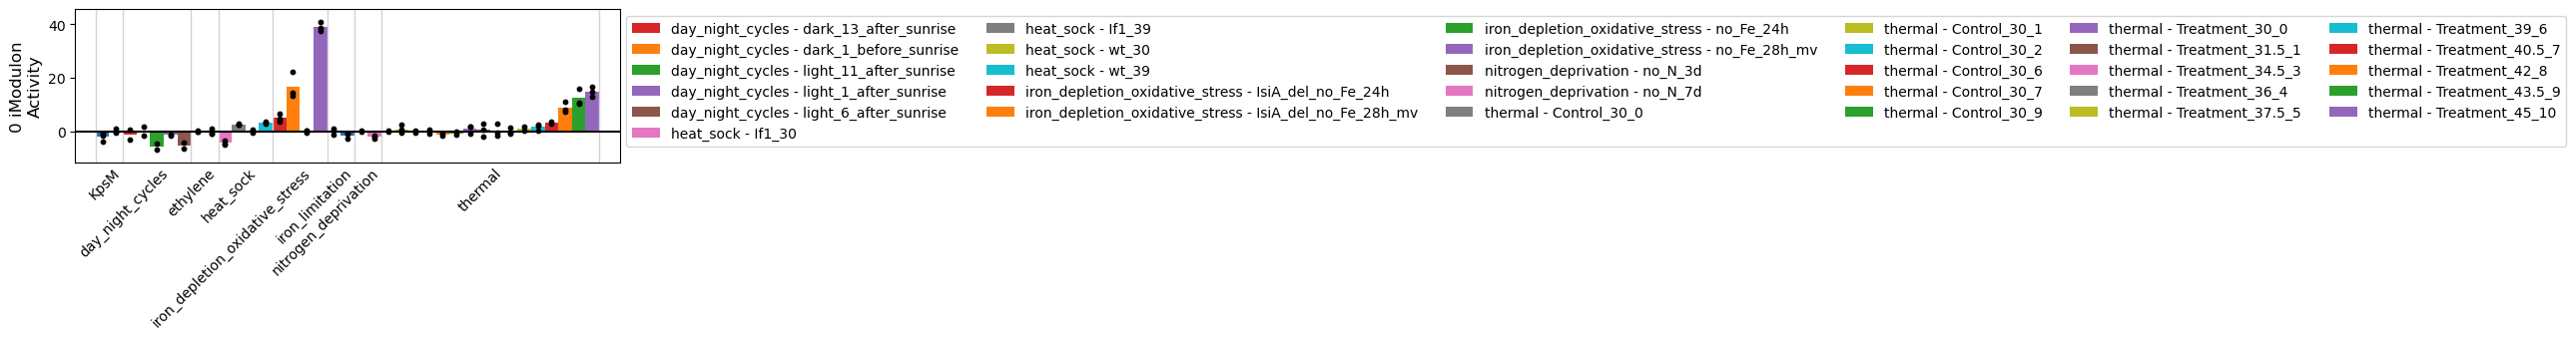

In [10]:
imodulon_id = 0 
features = ['COG', 'operon']
to_highligth = ['day_night_cycles', 'iron_depletion_oxidative_stress', 'thermal', 'heat_sock', 'nitrogen_deprivation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

Aunque no hay muchas anotaciones con respecto a los genes que componen este imodulon, presenta una actividad muy alta en condiciones de estrés oxidativo, por lo que se le va a renombrar temporalmente como 'oxidative_stress_response' en la categoria 'functional'

In [11]:
# Update the ica_data object
ica_data.rename_imodulons({0: 'oxidative_stress_response'})
ica_data.imodulon_table.loc['oxidative_stress_response','category'] = 'Global_stress'

### iModulon 1: Ribosome biogenesis

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
"Translation, ribosomal structure and biogenesis",28
Energy production and conversion,2
Signal transduction mechanisms,2
"Replication, recombination and repair",1
Inorganic ion transport and metabolism,1
Nucleotide transport and metabolism,1
Transcription,1
Carbohydrate transport and metabolism,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS05805,-0.127253,rpsQ,NC_000911.1,ssl3437,837741,837986,-,30S ribosomal protein S17,"Translation, ribosomal structure and biogenesis",A0A068N0R4_SYNY4;A0A6P1VEE2_9SYNC,Op269
SGL_RS05810,-0.126462,rpmC,NC_000911.1,ssl3436,837994,838215,-,50S ribosomal protein L29,"Translation, ribosomal structure and biogenesis",A0A6P1VI80_9SYNC,Op269
SGL_RS05815,-0.123456,rplP,NC_000911.1,sll1805,838218,838637,-,50S ribosomal protein L16,"Translation, ribosomal structure and biogenesis",A0A6P1VGZ5_9SYNC,Op269
SGL_RS05795,-0.114919,rplX,NC_000911.1,sll1807,837001,837348,-,50S ribosomal protein L24,"Translation, ribosomal structure and biogenesis",A0A6P1VDD7_9SYNC,Op269
SGL_RS05790,-0.107678,rplE,NC_000911.1,sll1808,836352,836894,-,50S ribosomal protein L5,"Translation, ribosomal structure and biogenesis",A0A6P1VFM1_9SYNC,Op2375
SGL_RS05820,-0.102720,rpsC,NC_000911.1,sll1804,838678,839400,-,30S ribosomal protein S3,"Translation, ribosomal structure and biogenesis",A0A6P1VER5_9SYNC,Op269
SGL_RS05800,-0.099848,rplN,NC_000911.1,sll1806,837349,837717,-,50S ribosomal protein L14,"Translation, ribosomal structure and biogenesis",A0A6P1VEI9_9SYNC;A0A068N4M9_SYNY4,Op269
SGL_RS05785,-0.099793,rpsH,NC_000911.1,sll1809,835859,836260,-,30S ribosomal protein S8,"Translation, ribosomal structure and biogenesis",A0A6P1VCH5_9SYNC,Op2197
SGL_RS05825,-0.094823,rplV,NC_000911.1,sll1803,839430,839795,-,50S ribosomal protein L22,"Translation, ribosomal structure and biogenesis",A0A6P1VHG2_9SYNC,Op269
SGL_RS05770,-0.089699,rpsE,NC_000911.1,sll1812,834333,834854,-,30S ribosomal protein S5,"Translation, ribosomal structure and biogenesis",A0A6P1VEQ6_9SYNC;A0A068MY90_SYNY4,Op531


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op269,9
Op777,3
Op531,3
Op597,2
Op2281,2
Op1078,2
Op257,2
Op2033,1
Op173,1
Op321,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS05805,-0.127253,rpsQ,NC_000911.1,ssl3437,837741,837986,-,30S ribosomal protein S17,"Translation, ribosomal structure and biogenesis",A0A068N0R4_SYNY4;A0A6P1VEE2_9SYNC,Op269
SGL_RS05810,-0.126462,rpmC,NC_000911.1,ssl3436,837994,838215,-,50S ribosomal protein L29,"Translation, ribosomal structure and biogenesis",A0A6P1VI80_9SYNC,Op269
SGL_RS05815,-0.123456,rplP,NC_000911.1,sll1805,838218,838637,-,50S ribosomal protein L16,"Translation, ribosomal structure and biogenesis",A0A6P1VGZ5_9SYNC,Op269
SGL_RS05795,-0.114919,rplX,NC_000911.1,sll1807,837001,837348,-,50S ribosomal protein L24,"Translation, ribosomal structure and biogenesis",A0A6P1VDD7_9SYNC,Op269
SGL_RS05820,-0.102720,rpsC,NC_000911.1,sll1804,838678,839400,-,30S ribosomal protein S3,"Translation, ribosomal structure and biogenesis",A0A6P1VER5_9SYNC,Op269
SGL_RS05800,-0.099848,rplN,NC_000911.1,sll1806,837349,837717,-,50S ribosomal protein L14,"Translation, ribosomal structure and biogenesis",A0A6P1VEI9_9SYNC;A0A068N4M9_SYNY4,Op269
SGL_RS05825,-0.094823,rplV,NC_000911.1,sll1803,839430,839795,-,50S ribosomal protein L22,"Translation, ribosomal structure and biogenesis",A0A6P1VHG2_9SYNC,Op269
SGL_RS05770,-0.089699,rpsE,NC_000911.1,sll1812,834333,834854,-,30S ribosomal protein S5,"Translation, ribosomal structure and biogenesis",A0A6P1VEQ6_9SYNC;A0A068MY90_SYNY4,Op531
SGL_RS05830,-0.087823,rpsS,NC_000911.1,ssl3432,839811,840089,-,30S ribosomal protein S19,"Translation, ribosomal structure and biogenesis",A0A6P1VFP6_9SYNC;A0A068N0R9_SYNY4,Op269
SGL_RS05840,-0.087051,SGL_RS05840,NC_000911.1,sll1801,841002,841307,-,50S ribosomal protein L23,"Translation, ribosomal structure and biogenesis",NaN,Op777


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
1,1,map03010,1.563306e-33,3.298575e-31,0.388060,0.490566,0.433333,26.0,53.0,67.0,KEGG pathways,Ribosome,NaN
0,1,M00178,1.563306e-33,3.361107e-31,0.388060,0.490566,0.433333,26.0,53.0,67.0,KEGG modules,NaN,"Ribosome, bacteria"
1,1,M00179,1.114389e-31,1.197968e-29,0.313433,0.700000,0.432990,21.0,30.0,67.0,KEGG modules,NaN,"Ribosome, archaea"
0,1,structural constituent of ribosome,4.033821e-29,3.513458e-26,0.313433,0.583333,0.407767,21.0,36.0,67.0,GO,NaN,NaN
1,1,cytosolic large ribosomal subunit,1.095099e-21,4.769155e-19,0.208955,0.736842,0.325581,14.0,19.0,67.0,GO,NaN,NaN
2,1,cytosolic small ribosomal subunit,3.988856e-07,1.158098e-04,0.074627,0.500000,0.129870,5.0,10.0,67.0,GO,NaN,NaN
3,1,translation,1.218767e-06,2.653865e-04,0.074627,0.416667,0.126582,5.0,12.0,67.0,GO,NaN,NaN
4,1,RNA binding,5.577349e-05,9.715741e-03,0.044776,0.600000,0.083333,3.0,5.0,67.0,GO,NaN,NaN
5,1,cytoplasmic translation,3.248506e-04,4.042070e-02,0.029851,1.000000,0.057971,2.0,2.0,67.0,GO,NaN,NaN
6,1,large ribosomal subunit rRNA binding,3.248506e-04,4.042070e-02,0.029851,1.000000,0.057971,2.0,2.0,67.0,GO,NaN,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

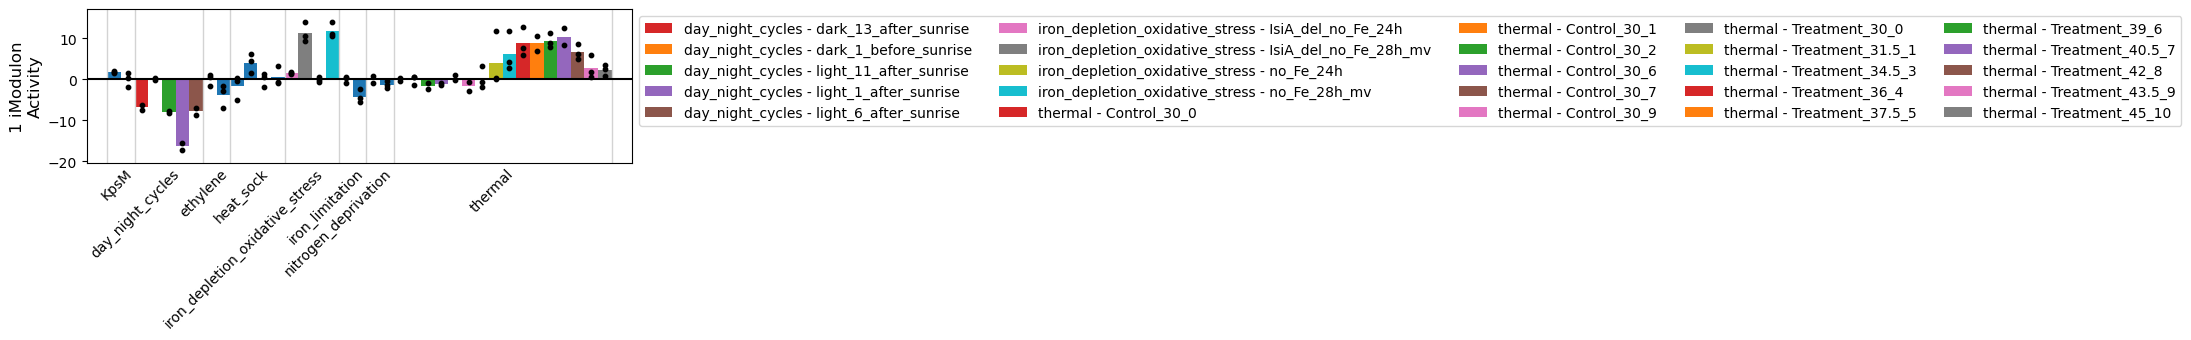

In [12]:
imodulon_id = 1 
to_highligth = ['day_night_cycles','iron_depletion_oxidative_stress','thermal']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

Como la activididad de este imodulon está relacionada con condiciones de estres de diversa índole y sus genes están anotados como componentes estructurales del ribosoma o agentes que participan en la traducción, se ha decidido asignarle la funcion **'Ribosome_biogenesis'**, dentro de la categoría **'translation'**.

In [13]:
# Update the ICA data object
ica_data.rename_imodulons({1:'ribosome_biogenesis'})
ica_data.imodulon_table.loc['ribosome_biogenesis','category'] = 'translation'

### iModulon 2: Unknown 1
This iModulon is likely some technical artifact from the heat_sock project.

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
"Replication, recombination and repair",9
Signal transduction mechanisms,7
"Intracellular trafficking, secretion, and vesicular transport",6
"Translation, ribosomal structure and biogenesis",6
Transcription,5
Nucleotide transport and metabolism,5
Energy production and conversion,5
Coenzyme transport and metabolism,4
Cell wall/membrane/envelope biogenesis,4
Amino acid transport and metabolism,4


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS11190,-0.088716,SGL_RS11190,NC_000911.1,slr1683,1972061,1972549,+,IS701 family transposase,"Replication, recombination and repair",NaN,Op584
SGL_RS06085,-0.049019,SGL_RS06085,NC_000911.1,slr1214,901197,902315,+,response regulator,Signal transduction mechanisms,NaN,Op1766
SGL_RS10715,-0.043163,tilS,NC_000911.1,slr1278,1872656,1873648,+,tRNA lysidine(34) synthetase TilS,"Translation, ribosomal structure and biogenesis",NaN,Op978
SGL_RS04545,-0.043063,SGL_RS04545,NC_000911.1,smr0008,571236,571355,+,photosystem II reaction center protein J,"Intracellular trafficking, secretion, and vesi...",A0A6P1VDP6_9SYNC;A0A068MYD7_SYNY4,Op368
SGL_RS20210,-0.042954,SGL_RS20210,NC_000911.1,NaN,605541,606035,-,IS630 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS14585,-0.042631,SGL_RS14585,NC_000911.1,slr0195,2726089,2726640,+,TolB family protein,"Intracellular trafficking, secretion, and vesi...",NaN,Op1045
SGL_RS19875,-0.040068,SGL_RS19875,NC_000911.1,NaN,1702130,1702279,-,IS1 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS04540,-0.038572,SGL_RS04540,NC_000911.1,smr0007,571084,571203,+,photosystem II reaction center protein L,"Intracellular trafficking, secretion, and vesi...",A0A6P1VDV4_9SYNC,Op368
SGL_RS05205,-0.035145,SGL_RS05205,NC_000911.1,sll1582,716309,719665,-,DEAD/DEAH box helicase,"Replication, recombination and repair",NaN,Op106
SGL_RS06575,-0.033864,SGL_RS06575,NC_000911.1,sll1454,1002633,1004777,-,nitrate reductase,Energy production and conversion,NaN,Op2141


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op841,3
Op649,2
Op368,2
Op420,2
Op707,2
...,...
Op1379,1
Op2325,1
Op1281,1
Op2601,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

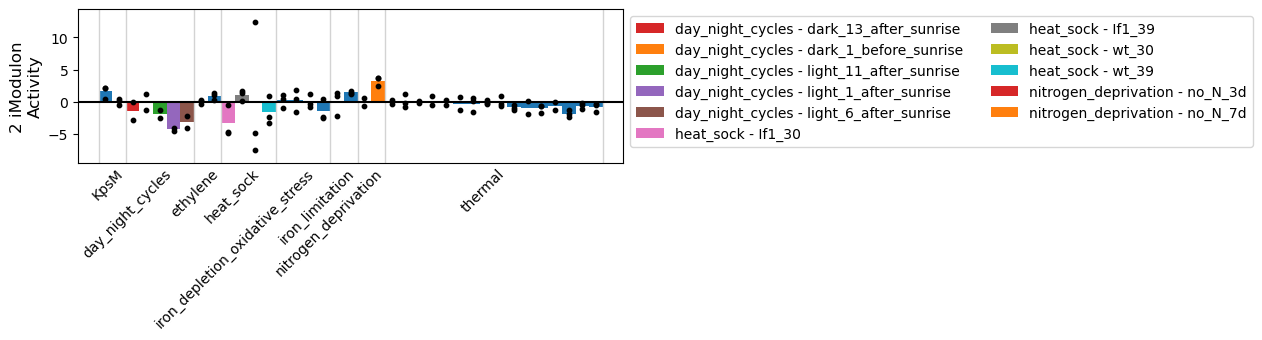

In [14]:
imodulon_id = 2
to_highligth = ['day_night_cycles','heat_sock','nitrogen_deprivation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=5)

In [15]:
# Update the ICA data object
ica_data.rename_imodulons({2:'Unknown_1'})

### iModulon 3: Phosphate ABC transport system

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Inorganic ion transport and metabolism,9
Transcription,3
Signal transduction mechanisms,3
Nucleotide transport and metabolism,1
Cell wall/membrane/envelope biogenesis,1
"Post-translational modification, protein turnover, and chaperones",1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS16110,0.066835,SGL_RS16110,NC_000911.1,sll0789,3064912,3065610,-,response regulator transcription factor,Transcription,NaN,Op482
SGL_RS14185,0.072643,pstB,NC_000911.1,sll0683,2637743,2638552,-,phosphate ABC transporter ATP-binding protein ...,Inorganic ion transport and metabolism,A0A6P1VL92_9SYNC,Op104
SGL_RS14190,0.075044,pstA,NC_000911.1,sll0682,2638578,2639441,-,phosphate ABC transporter permease PstA,Inorganic ion transport and metabolism,NaN,Op104
SGL_RS14180,0.077056,pstB,NC_000911.1,sll0684,2636828,2637628,-,phosphate ABC transporter ATP-binding protein ...,Inorganic ion transport and metabolism,A0A6P1VJZ8_9SYNC,Op104
SGL_RS01550,0.079783,SGL_RS01550,NC_005232.1,slr6040,35381,36079,+,response regulator transcription factor,Transcription,A0A0F6QCH5_9SYNC,Op1978
SGL_RS08405,0.084708,pstB,NC_000911.1,slr1250,1391976,1392791,+,phosphate ABC transporter ATP-binding protein ...,Inorganic ion transport and metabolism,A0A6P1VDU0_9SYNC,Op73
SGL_RS01555,0.086873,SGL_RS01555,NC_005232.1,slr6041,36066,37418,+,ATP-binding protein,Signal transduction mechanisms,A0A0F6QFI0_9SYNC,Op1978
SGL_RS16105,0.087564,SGL_RS16105,NC_000911.1,sll0790,3063549,3064925,-,ATP-binding protein,Signal transduction mechanisms,NaN,Op482
SGL_RS18370,0.100187,SGL_RS18370,NC_000911.1,slr0607,3569134,3569523,+,cyclic nucleotide-binding domain-containing pr...,Signal transduction mechanisms,NaN,Op766
SGL_RS15585,0.105237,SGL_RS15585,NC_000911.1,sll0594,2944272,2944889,-,Crp/Fnr family transcriptional regulator,Transcription,NaN,Op2263


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op104,5
Op73,4
Op482,3
Op1978,3
Op2201,1
Op1941,1
Op1502,1
Op2569,1
Op2263,1
Op2339,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS16110,0.066835,SGL_RS16110,NC_000911.1,sll0789,3064912,3065610,-,response regulator transcription factor,Transcription,NaN,Op482
SGL_RS16115,0.068384,SGL_RS16115,NC_000911.1,sll0788,3065617,3066207,-,DUF305 domain-containing protein,Function unknown,NaN,Op482
SGL_RS14185,0.072643,pstB,NC_000911.1,sll0683,2637743,2638552,-,phosphate ABC transporter ATP-binding protein ...,Inorganic ion transport and metabolism,A0A6P1VL92_9SYNC,Op104
SGL_RS01545,0.072744,SGL_RS01545,NC_005232.1,slr6039,34784,35374,+,DUF305 domain-containing protein,Function unknown,A0A0F6QDN6_9SYNC,Op1978
SGL_RS14190,0.075044,pstA,NC_000911.1,sll0682,2638578,2639441,-,phosphate ABC transporter permease PstA,Inorganic ion transport and metabolism,NaN,Op104
SGL_RS14180,0.077056,pstB,NC_000911.1,sll0684,2636828,2637628,-,phosphate ABC transporter ATP-binding protein ...,Inorganic ion transport and metabolism,A0A6P1VJZ8_9SYNC,Op104
SGL_RS01550,0.079783,SGL_RS01550,NC_005232.1,slr6040,35381,36079,+,response regulator transcription factor,Transcription,A0A0F6QCH5_9SYNC,Op1978
SGL_RS08405,0.084708,pstB,NC_000911.1,slr1250,1391976,1392791,+,phosphate ABC transporter ATP-binding protein ...,Inorganic ion transport and metabolism,A0A6P1VDU0_9SYNC,Op73
SGL_RS01555,0.086873,SGL_RS01555,NC_005232.1,slr6041,36066,37418,+,ATP-binding protein,Signal transduction mechanisms,A0A0F6QFI0_9SYNC,Op1978
SGL_RS16105,0.087564,SGL_RS16105,NC_000911.1,sll0790,3063549,3064925,-,ATP-binding protein,Signal transduction mechanisms,NaN,Op482


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
2,3,M00222,1.087344e-18,2.337790e-16,0.321429,0.818182,0.461538,9.0,11.0,28.0,KEGG modules,NaN,Phosphate transport system
2,3,map02010,5.167328e-09,1.090306e-06,0.321429,0.107143,0.160714,9.0,84.0,28.0,KEGG pathways,ABC transporters,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

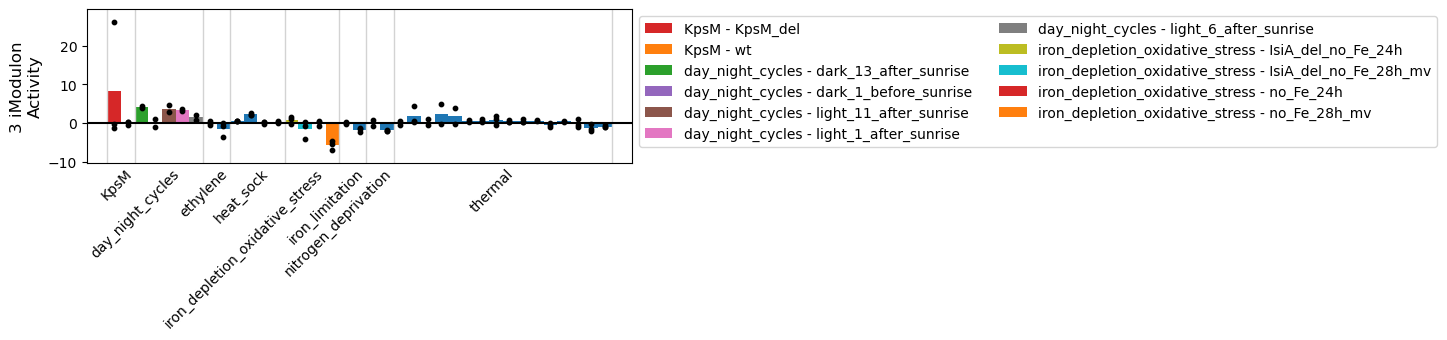

In [16]:
imodulon_id = 3
to_highligth = ['day_night_cycles','iron_depletion_oxidative_stress','KpsM']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)


Este imodulon está compuesto por varios operones asociados enteramente a 'Inorganic ion transport and metabolism'. Este hecho, junto con los resultados de enriquecimiento y la actividad que presenta con limitación d hierro en el WT, dejan ver que este imodulon está directamente relacionado con el transporte de iones inorgánicos. De esta forma, se le asigna el nombre **'Phosphate ABC transport system'**, dentro de la categoría **'Element homeostasis'**:

In [17]:
# Update the ica_data object
ica_data.rename_imodulons({3:'Phosphate_ABC_transport_system'})
ica_data.imodulon_table.loc['Phosphate_ABC_transport_system','category'] = 'Element_homeostasis'

### iModulon 4: Metal related response Manganese

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Inorganic ion transport and metabolism,2
Signal transduction mechanisms,2
Transcription,2
Energy production and conversion,1
"Intracellular trafficking, secretion, and vesicular transport",1


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op482,3
Op1978,3
Op246,2
Op631,1
Op1050,1
Op1006,1
Op320,1
Op1718,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS01555,0.104889,SGL_RS01555,NC_005232.1,slr6041,36066,37418,+,ATP-binding protein,Signal transduction mechanisms,A0A0F6QFI0_9SYNC,Op1978
SGL_RS16105,0.131151,SGL_RS16105,NC_000911.1,sll0790,3063549,3064925,-,ATP-binding protein,Signal transduction mechanisms,NaN,Op482
SGL_RS16110,0.194822,SGL_RS16110,NC_000911.1,sll0789,3064912,3065610,-,response regulator transcription factor,Transcription,NaN,Op482
SGL_RS01550,0.196173,SGL_RS01550,NC_005232.1,slr6040,35381,36079,+,response regulator transcription factor,Transcription,A0A0F6QCH5_9SYNC,Op1978
SGL_RS01545,0.219338,SGL_RS01545,NC_005232.1,slr6039,34784,35374,+,DUF305 domain-containing protein,Function unknown,A0A0F6QDN6_9SYNC,Op1978
SGL_RS16115,0.222312,SGL_RS16115,NC_000911.1,sll0788,3065617,3066207,-,DUF305 domain-containing protein,Function unknown,NaN,Op482


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
3,4,M00316,4.350375e-08,0.000009,0.214286,1.0,0.352941,3.0,3.0,14.0,KEGG modules,NaN,Manganese transport system


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

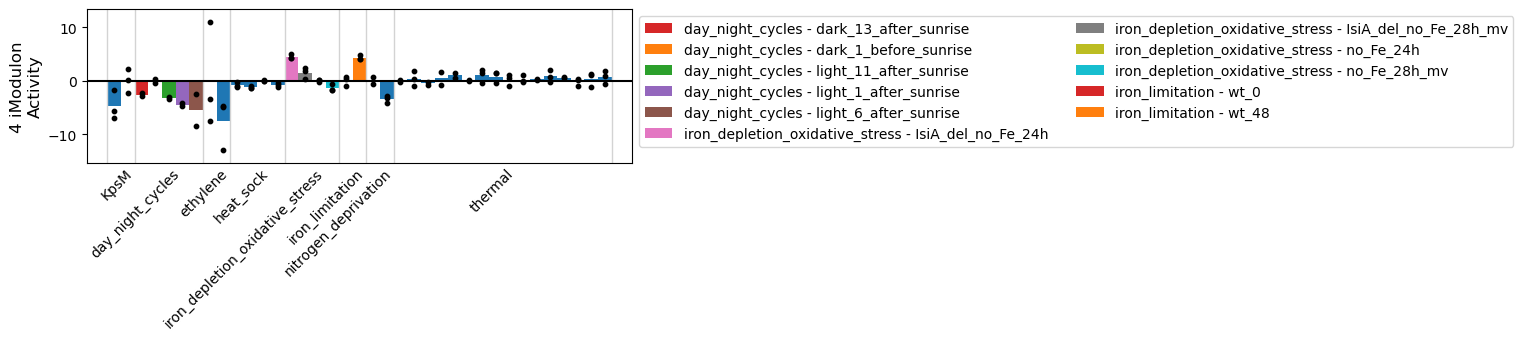

In [18]:
imodulon_id = 4
to_highligth = ['day_night_cycles','iron_depletion_oxidative_stress', 'iron_limitation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

El hecho de que comparta operones con el imodulon 3, junto con los datos de enriquecimiento asociándolo con transporte de manganeso y la alta actividad en limitaciones de hierro, me sugiere que el imodulon tiene una función relacionada con la homeostasis de metales. Por eso se ha decidido nombrarlo como **'Metal related response Manganese'**, dentro de la categoría **'Element homeostasis'**.

In [19]:
# Update the ica_data object
ica_data.rename_imodulons({4:'Metal_related_response_Manganese'})
ica_data.imodulon_table.loc['Metal_related_response_Manganese','category'] = 'Element_homeostasis'

### iModulon 5 : EPS Secretion System

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Inorganic ion transport and metabolism,17
"Post-translational modification, protein turnover, and chaperones",14
Transcription,14
Energy production and conversion,14
Cell wall/membrane/envelope biogenesis,12
Signal transduction mechanisms,12
"Replication, recombination and repair",11
"Translation, ribosomal structure and biogenesis",11
Amino acid transport and metabolism,11
Lipid transport and metabolism,9


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS06485,-0.075365,SGL_RS06485,NC_000911.1,slr1546,984658,985200,+,anti-sigma factor,Transcription,NaN,Op585
SGL_RS06480,-0.059152,SGL_RS06480,NC_000911.1,slr1545,983804,984475,+,sigma-70 family RNA polymerase sigma factor,Transcription,NaN,Op1877
SGL_RS13460,-0.051918,murA,NC_000911.1,slr0017,2486607,2487923,+,UDP-N-acetylglucosamine 1-carboxyvinyltransferase,Cell wall/membrane/envelope biogenesis,NaN,Op444
SGL_RS07090,-0.049660,SGL_RS07090,NC_000911.1,sll1270,1114429,1116012,-,ABC transporter permease subunit,Inorganic ion transport and metabolism,NaN,Op1702
SGL_RS16945,-0.048350,SGL_RS16945,NC_000911.1,slr0554,3254599,3257670,+,DUF3854 domain-containing protein,Transcription,NaN,Op891
...,...,...,...,...,...,...,...,...,...,...,...
SGL_RS14440,0.045373,SGL_RS14440,NC_000911.1,sll0382,2693725,2694255,-,carboxypeptidase-like regulatory domain-contai...,Inorganic ion transport and metabolism,NaN,Op121
SGL_RS13820,0.047403,SGL_RS13820,NC_000911.1,sll0072,2565427,2566110,-,helix-turn-helix domain-containing protein,Transcription,NaN,Op809
SGL_RS16475,0.050479,SGL_RS16475,NC_000911.1,sll0043,3144213,3148421,-,Hpt domain-containing protein,Signal transduction mechanisms,NaN,Op1020
SGL_RS14425,0.052245,SGL_RS14425,NC_000911.1,sll0385,2691528,2692382,-,energy-coupling factor ABC transporter ATP-bin...,Inorganic ion transport and metabolism,NaN,Op121


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op665,4
Op121,4
Op762,3
Op1020,3
Op721,2
...,...
Op508,1
Op2151,1
Op653,1
Op1218,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
4,5,M00246,0.000054,0.011509,0.012618,1.0,0.024922,4.0,4.0,317.0,KEGG modules,NaN,Nickel transport system
5,5,M00245,0.000629,0.067568,0.009464,1.0,0.018750,3.0,3.0,317.0,KEGG modules,NaN,Cobalt/nickel transport system


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

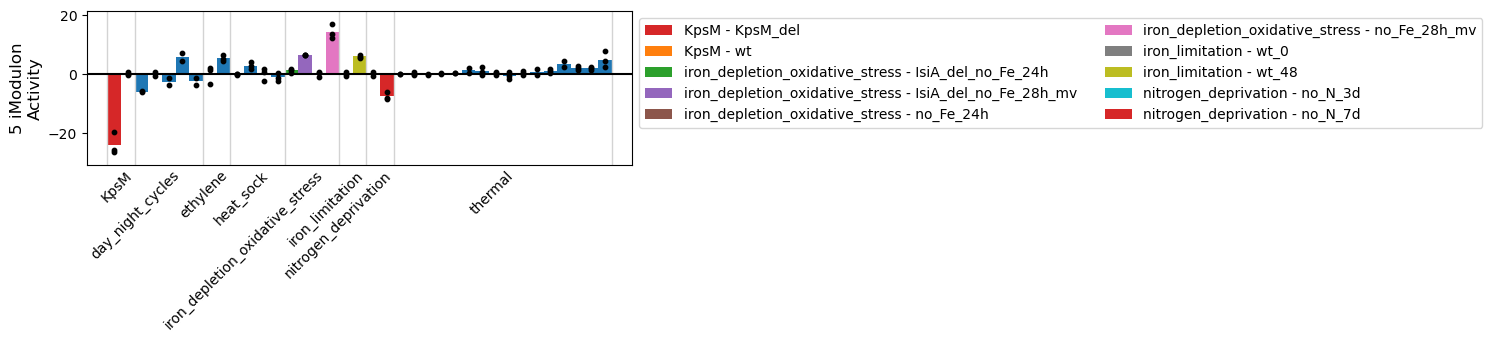

In [20]:
imodulon_id = 5
to_highligth = ['KpsM','iron_depletion_oxidative_stress', 'iron_limitation', 'nitrogen_deprivation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=12)

Este iModulon presenta una drástica reducción de la actividad cuando se deleciona KpsM. Se ha documentado que la deleción del gen que codifica a esta proteína implica una drástica reducción en la secreción de Extracellular Polymeric Substances (EPS), por lo que este iModulon reflejaría bien dicho comportamiento. Por este patrón, y por su composición de COGs, voy a nombrar este iModulon como **'EPS Secretion System'** within the category **'Extracellular Structures'**

In [21]:
# Update the ica_data object
ica_data.rename_imodulons({5:'EPS_secretion_system'})
ica_data.imodulon_table.loc['EPS_secretion_system','category'] = 'Extracellular_structures'

### iModulon 6 : IsiA-related

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
"Secondary metabolites biosynthesis, transport, and catabolism",1
Energy production and conversion,1
RNA processing and modification,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS08955,0.313029,SGL_RS08955,NC_000911.1,sll0249,1515669,1516424,-,alpha/beta hydrolase,"Secondary metabolites biosynthesis, transport,...",NaN,Op2527
SGL_RS08960,0.361951,fldA,NC_000911.1,sll0248,1516659,1517171,-,flavodoxin FldA,Energy production and conversion,NaN,Op101
SGL_RS08965,0.504317,SGL_RS08965,NC_000911.1,sll0247,1517576,1518604,-,chlorophyll a/b binding light-harvesting protein,RNA processing and modification,NaN,Op1780


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op2527,1
Op101,1
Op1780,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS08955,0.313029,SGL_RS08955,NC_000911.1,sll0249,1515669,1516424,-,alpha/beta hydrolase,"Secondary metabolites biosynthesis, transport,...",NaN,Op2527
SGL_RS08960,0.361951,fldA,NC_000911.1,sll0248,1516659,1517171,-,flavodoxin FldA,Energy production and conversion,NaN,Op101
SGL_RS08965,0.504317,SGL_RS08965,NC_000911.1,sll0247,1517576,1518604,-,chlorophyll a/b binding light-harvesting protein,RNA processing and modification,NaN,Op1780


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

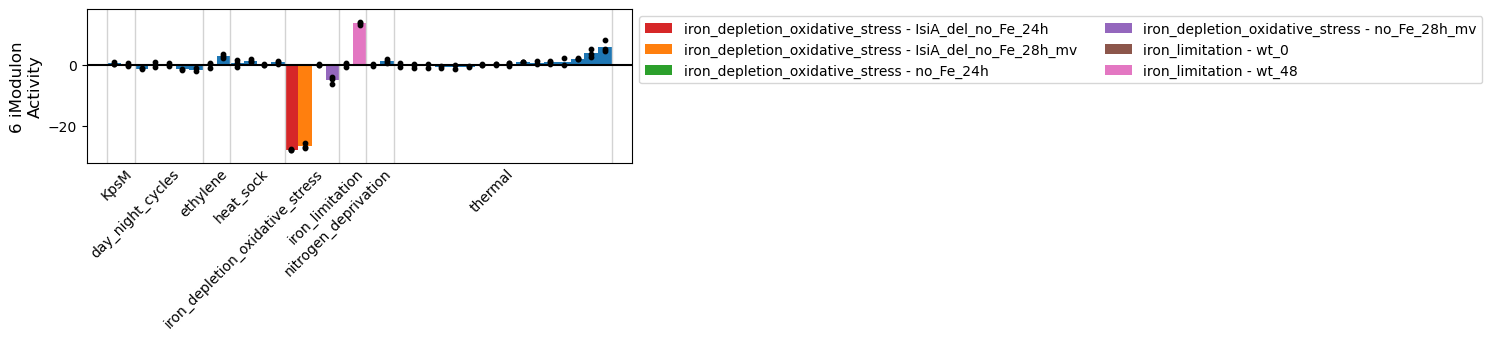

In [22]:
imodulon_id = 6
to_highligth = ['iron_depletion_oxidative_stress', 'iron_limitation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=1)

A pesar de no tener COGs, operones ni enriquecimientos claros, este imodulon está claramente relacionado con el gen IsiA, ya que unicamente con su delección aparece este imodulon con una actividad mínima. Este gen codifica una proteína de unión a la clorofila que se induce significativamente bajo la inanición de hierro y el estrés oxidativo. Por esto, nombramos este imodulon como **'IsiA related'**, dentro de la categoría **'Iron Starvation'**

In [23]:
# Update the ica_data object
ica_data.rename_imodulons({6:'IsiA_related'})
ica_data.imodulon_table.loc['IsiA_related','category'] = 'Iron_starvation'

### iModulon 7 : Transposase related

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
"Replication, recombination and repair",15
Energy production and conversion,4
"Post-translational modification, protein turnover, and chaperones",2
Signal transduction mechanisms,1
Defense mechanisms,1
Nucleotide transport and metabolism,1
"Cell cycle control, cell division, chromosome partitioning",1
"Translation, ribosomal structure and biogenesis",1
Inorganic ion transport and metabolism,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS02500,-0.060884,SGL_RS02500,NC_000911.1,NaN,141123,141428,-,transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS17175,0.051936,apcB,NC_000911.1,slr1459,3304872,3305381,+,allophycocyanin subunit beta,Energy production and conversion,NaN,Op2308
SGL_RS06960,0.055372,SGL_RS06960,NC_000911.1,slr1449,1090818,1091279,+,cytochrome b,Energy production and conversion,NaN,Op82
SGL_RS18830,0.066845,SGL_RS18830,NC_000911.1,NaN,1553929,1554507,-,IS630 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS09140,0.068454,SGL_RS09140,NC_000911.1,NaN,1554855,1555645,-,IS701 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS13845,0.068879,SGL_RS13845,NC_000911.1,sll0068,2569772,2573491,-,NACHT domain-containing protein,Energy production and conversion,NaN,Op861
SGL_RS18905,0.083744,SGL_RS18905,NC_000911.1,NaN,1901385,1901963,-,IS630 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS18635,0.083752,SGL_RS18635,NC_000911.1,NaN,52260,53108,-,IS630-like element ISTcSa family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS18875,0.093241,SGL_RS18875,NC_000911.1,NaN,1725431,1726009,-,IS630 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS19145,0.094068,SGL_RS19145,NC_000911.1,NaN,3512315,3513163,-,IS630-like element ISTcSa family transposase,"Replication, recombination and repair",NaN,NaN


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op423,2
Op291,2
Op204,1
Op1698,1
Op1104,1
Op448,1
Op2667,1
Op1719,1
Op969,1
Op185,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

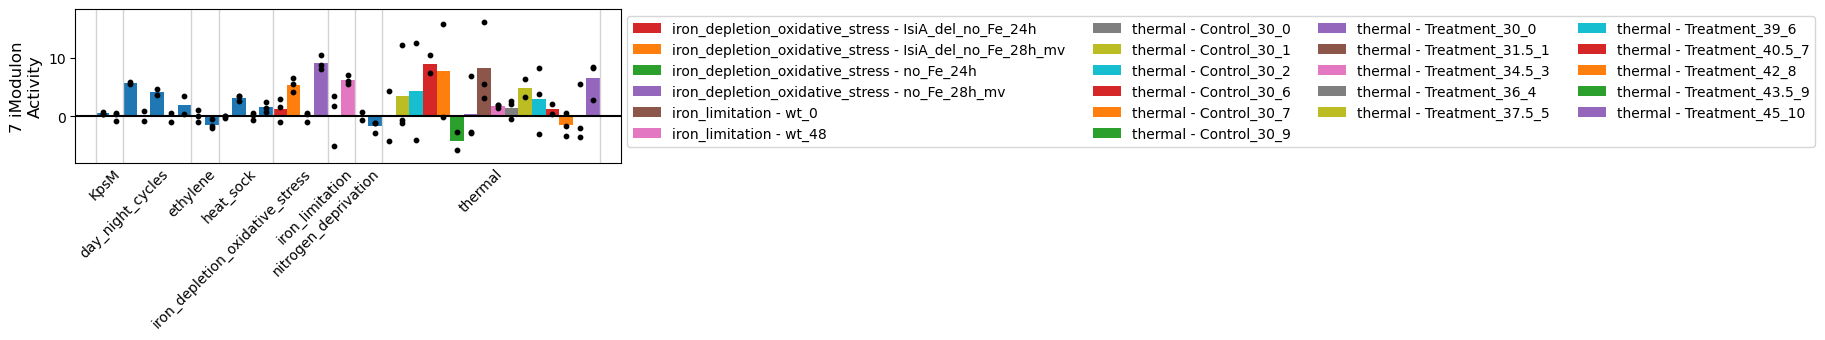

In [24]:
imodulon_id = 7
to_highligth = ['iron_depletion_oxidative_stress','thermal','iron_limitation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=4)

La clasificación de este imodulon no está clara, ya que presenta una respuesta heterogenea en las diferentes condiciones y no presenta enriquecimiento en ningún COG. Sin embargo, como tiene un gran número de genes asociados a transposasas se va a nombrar como **'Transposase-related'**, que estaría en la categoría **'Recombination'**.

In [25]:
# Update ICA data object
ica_data.rename_imodulons({7:'Transposase_related'})
ica_data.imodulon_table.loc['Transposase_related','category'] = 'Recombination'

### iModulon 8: High affinity CO2 uptake

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Energy production and conversion,6
Inorganic ion transport and metabolism,4
"Translation, ribosomal structure and biogenesis",1
Cell wall/membrane/envelope biogenesis,1
Transcription,1
Amino acid transport and metabolism,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS05370,0.080564,SGL_RS05370,NC_000911.1,slr2010,751034,751426,+,Na+/H+ antiporter subunit E,Inorganic ion transport and metabolism,A0A6P1VI10_9SYNC,Op180
SGL_RS16565,0.083457,SGL_RS16565,NC_000911.1,slr0040,3169054,3170412,+,CmpA/NrtA family ABC transporter substrate-bin...,Inorganic ion transport and metabolism,NaN,Op1857
SGL_RS02635,0.094757,SGL_RS02635,NC_000911.1,sll0219,164037,165821,-,diflavin flavoprotein,Energy production and conversion,NaN,Op537
SGL_RS02645,0.096208,SGL_RS02645,NC_000911.1,sll0217,166416,168152,-,diflavin flavoprotein,Energy production and conversion,NaN,Op309
SGL_RS05360,0.105254,SGL_RS05360,NC_000911.1,slr2008,749150,749500,+,cation:proton antiporter subunit C,Inorganic ion transport and metabolism,NaN,Op1043
SGL_RS06290,0.105766,SGL_RS06290,NC_000911.1,sll1733,936768,938276,-,NADH-quinone oxidoreductase subunit M,Energy production and conversion,NaN,Op1609
SGL_RS05355,0.122000,SGL_RS05355,NC_000911.1,slr2007,747575,749038,+,cation:proton antiporter,Energy production and conversion,NaN,Op1564
SGL_RS06285,0.128580,SGL_RS06285,NC_000911.1,sll1734,935409,936704,-,CO2 hydration protein,Energy production and conversion,NaN,Op993
SGL_RS06295,0.156334,SGL_RS06295,NC_000911.1,sll1732,938393,940240,-,NAD(P)H-quinone oxidoreductase subunit F,Energy production and conversion,NaN,Op5
SGL_RS05350,0.163362,SGL_RS05350,NC_000911.1,slr2006,747234,747578,+,NADH-quinone oxidoreductase subunit K,Inorganic ion transport and metabolism,A0A6P1VFD3_9SYNC,Op1564


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op309,2
Op1564,2
Op537,1
Op1338,1
Op1043,1
Op180,1
Op1575,1
Op993,1
Op1609,1
Op5,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

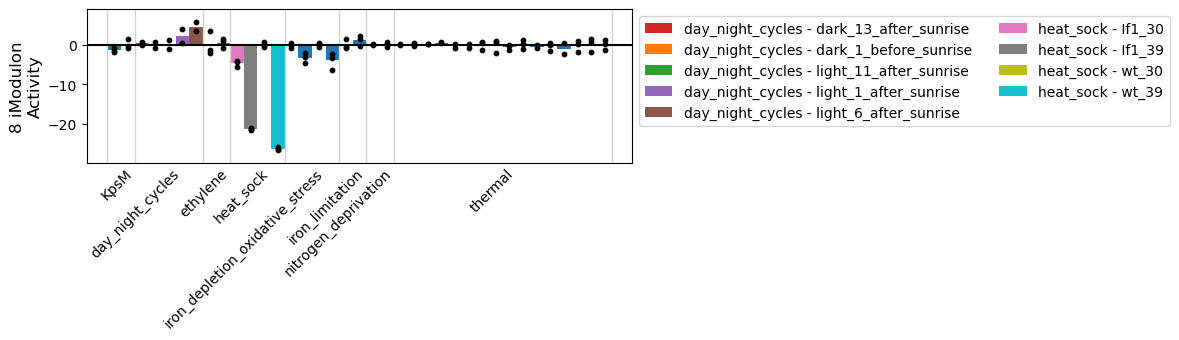

In [26]:
imodulon_id = 8
to_highligth = ['day_night_cycles', 'heat_sock']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=4)

Este imodulon contiene la enzima encargada de incorporar el CO2 en condiciones con bajas concentraciones del mismo, así como varias enzimas de la cadena de transporte electrónico. De esta forma, viendo las anotaciones y los COGs de los genes asociados a este imodulon, he decidido nombrarlo como **'High affinity CO2 uptake'**, dentro de la categoría **'Carbon metabolism'**.

In [27]:
# Update the ica_data object
ica_data.rename_imodulons({8:'High_affinity_CO2_uptake'})
ica_data.imodulon_table.loc['High_affinity_CO2_uptake','category'] = 'Carbon Metabolism'


## iModulon 9: Iron Uptake

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Inorganic ion transport and metabolism,6
"Intracellular trafficking, secretion, and vesicular transport",4
Cell wall/membrane/envelope biogenesis,2
Energy production and conversion,2
Coenzyme transport and metabolism,1
Transcription,1
"Secondary metabolites biosynthesis, transport, and catabolism",1
Defense mechanisms,1
Signal transduction mechanisms,1
"Post-translational modification, protein turnover, and chaperones",1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS13450,-0.114093,petF1,NC_000911.1,ssl0020,2484890,2485183,-,ferredoxin PetF1,Energy production and conversion,A0A6P1VIB0_9SYNC,Op2376
SGL_RS05875,-0.077086,SGL_RS05875,NC_000911.1,sll1796,845966,846328,-,c-type cytochrome,Energy production and conversion,A0A6P1VES6_9SYNC,Op631
SGL_RS01945,0.067657,SGL_RS01945,NC_000911.1,slr1319,16740,17687,+,iron-siderophore ABC transporter substrate-bin...,Inorganic ion transport and metabolism,NaN,Op1019
SGL_RS01935,0.069739,SGL_RS01935,NC_000911.1,slr1317,14626,15675,+,iron ABC transporter permease,"Intracellular trafficking, secretion, and vesi...",NaN,Op1378
SGL_RS01930,0.085834,SGL_RS01930,NC_000911.1,slr1316,13498,14529,+,iron ABC transporter permease,"Intracellular trafficking, secretion, and vesi...",NaN,Op1200
SGL_RS06755,0.096322,SGL_RS06755,NC_000911.1,ssl2250,1044517,1044693,-,bacterioferritin-associated ferredoxin,Inorganic ion transport and metabolism,NaN,Op2503
SGL_RS17810,0.107264,SGL_RS17810,NC_000911.1,sll1550,3454422,3456044,-,iron uptake porin,Cell wall/membrane/envelope biogenesis,NaN,Op1232
SGL_RS03245,0.115449,SGL_RS03245,NC_000911.1,slr1295,291626,292708,+,Fe(3+) ABC transporter substrate-binding protein,Inorganic ion transport and metabolism,A0A6P1VFM9_9SYNC,Op1224
SGL_RS01975,0.123830,SGL_RS01975,NC_000911.1,sll1409,25266,27839,-,TonB-dependent siderophore receptor,Inorganic ion transport and metabolism,NaN,Op645
SGL_RS15495,0.131601,SGL_RS15495,NC_000911.1,slr0513,2924779,2925819,+,Fe(3+) ABC transporter substrate-binding protein,Inorganic ion transport and metabolism,NaN,Op890


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op288,2
Op1019,2
Op2412,2
Op631,1
Op1232,1
Op890,1
Op2376,1
Op2088,1
Op747,1
Op651,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS01945,0.067657,SGL_RS01945,NC_000911.1,slr1319,16740,17687,+,iron-siderophore ABC transporter substrate-bin...,Inorganic ion transport and metabolism,NaN,Op1019
SGL_RS01940,0.104334,SGL_RS01940,NC_000911.1,slr1318,15937,16743,+,ABC transporter ATP-binding protein,Coenzyme transport and metabolism,NaN,Op1019
SGL_RS05125,0.127151,feoB,NC_000911.1,slr1392,698970,700814,+,ferrous iron transport protein B,No COG annotation,NaN,Op288
SGL_RS05120,0.151948,SGL_RS05120,NC_000911.1,ssr2333,698723,698962,+,ferrous iron transport protein A,No COG annotation,NaN,Op288
SGL_RS01995,0.210803,SGL_RS01995,NC_000911.1,sll1405,32524,32928,-,biopolymer transporter ExbD,"Intracellular trafficking, secretion, and vesi...",NaN,Op2412
SGL_RS02000,0.217892,SGL_RS02000,NC_000911.1,sll1404,32912,33544,-,MotA/TolQ/ExbB proton channel family protein,"Intracellular trafficking, secretion, and vesi...",NaN,Op2412


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
6,9,M00240,2.636184e-08,0.000006,0.121212,0.800000,0.210526,4.0,5.0,33.0,KEGG modules,NaN,Iron complex transport system
7,9,M00190,6.441446e-06,0.000692,0.090909,0.600000,0.157895,3.0,5.0,33.0,KEGG modules,NaN,Iron(III) transport system
3,9,map02010,6.517585e-06,0.001375,0.212121,0.083333,0.119658,7.0,84.0,33.0,KEGG pathways,ABC transporters,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

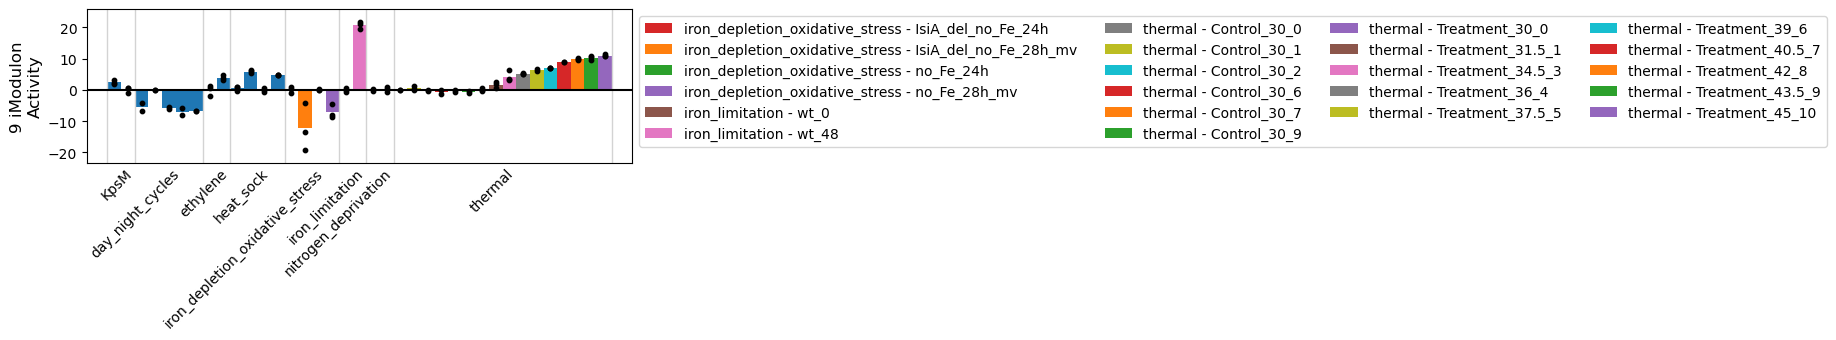

In [28]:
imodulon_id = 9
features = ['COG', 'operon']
to_highligth = ['iron_limitation', 'iron_depletion_oxidative_stress', 'thermal']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=2)

Given the extensive annotation related with iron transporters, that is also coherent with found operons and enrichments, I am going to name this imodulon as **'Iron Uptake'**, in the category of **'Metal Homeostasis'**.

In [29]:
ica_data.rename_imodulons({9:'Iron_uptake'})
ica_data.imodulon_table.loc['Iron_uptake','category'] = 'Metal_homeostasis'
ica_data.imodulon_table.loc['Metal_related_response_Manganese','category'] = 'Metal_homeostasis'

### iModulon 10 : Unknown 2

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op408,3
Op352,3
Op423,2
Op1616,2
Op721,2
Op864,1
Op1995,1
Op468,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS00945,0.135479,SGL_RS00945,NC_005230.1,sll7067,60905,62581,-,hypothetical protein,No COG annotation,NaN,Op352
SGL_RS00925,0.148370,SGL_RS00925,NC_005230.1,sll7063,54005,56392,-,TIGR03986 family CRISPR-associated RAMP protein,No COG annotation,NaN,Op408
SGL_RS00940,0.149637,SGL_RS00940,NC_005230.1,sll7066,58527,60902,-,RAMP superfamily CRISPR-associated protein,No COG annotation,NaN,Op352
SGL_RS00935,0.152597,SGL_RS00935,NC_005230.1,sll7065,56954,58522,-,RAMP superfamily CRISPR-associated protein,No COG annotation,NaN,Op352
SGL_RS00920,0.157620,SGL_RS00920,NC_005230.1,sll7062,52881,53996,-,hypothetical protein,No COG annotation,NaN,Op408
SGL_RS00930,0.165016,csx19,NC_005230.1,sll7064,56394,56954,-,CRISPR-associated protein Csx19,No COG annotation,NaN,Op408


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

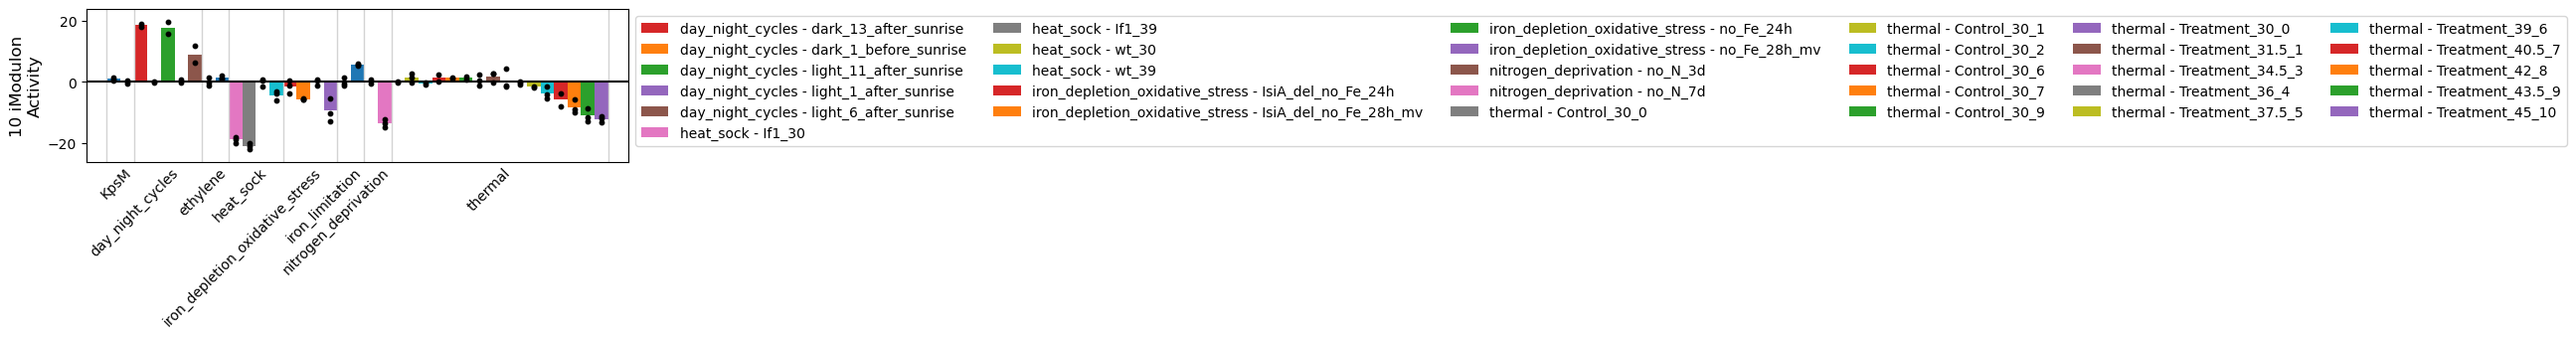

In [30]:
imodulon_id = 10
features = ['COG', 'operon']
to_highligth = ['day_night_cycles', 'iron_depletion_oxidative_stress', 'thermal', 'heat_sock', 'nitrogen_deprivation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

There is no consistent annotation, enrichment or activity pattern to infer any classification for this iModulon. So it will be named **'Unkown 2'**.

In [31]:
ica_data.rename_imodulons({10:'Unknown_2'})

### iModulon 11 : Stringent response

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Energy production and conversion,10
"Translation, ribosomal structure and biogenesis",7
"Post-translational modification, protein turnover, and chaperones",7
"Replication, recombination and repair",7
Coenzyme transport and metabolism,6
"Intracellular trafficking, secretion, and vesicular transport",5
Signal transduction mechanisms,5
Amino acid transport and metabolism,5
Nucleotide transport and metabolism,4
"Secondary metabolites biosynthesis, transport, and catabolism",3


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS08075,-0.086493,SGL_RS08075,NC_000911.1,sll1621,1324835,1325404,-,peroxiredoxin,"Post-translational modification, protein turno...",A0A6P1VFL3_9SYNC,Op2025
SGL_RS18010,-0.078109,SGL_RS18010,NC_000911.1,sll0441,3497389,3498759,-,GIY-YIG nuclease family protein,"Replication, recombination and repair",NaN,Op118
SGL_RS05200,-0.057716,SGL_RS05200,NC_000911.1,sll1583,714465,716153,-,DNA ligase,"Replication, recombination and repair",NaN,Op2466
SGL_RS19875,-0.057097,SGL_RS19875,NC_000911.1,NaN,1702130,1702279,-,IS1 family transposase,"Replication, recombination and repair",NaN,NaN
SGL_RS05195,-0.052849,SGL_RS05195,NC_000911.1,sll1584,713774,714178,-,ferredoxin,Energy production and conversion,NaN,Op2146
SGL_RS10175,-0.051968,SGL_RS10175,NC_000911.1,slr1957,1755592,1755912,+,hypothetical protein,"Replication, recombination and repair",NaN,Op1257
SGL_RS06170,-0.051157,groL,NC_000911.1,slr2076,915721,917346,+,chaperonin GroEL,"Post-translational modification, protein turno...",NaN,Op1979
SGL_RS03345,-0.047309,hemF,NC_000911.1,sll1185,315882,316904,-,oxygen-dependent coproporphyrinogen oxidase,Coenzyme transport and metabolism,NaN,Op2353
SGL_RS03250,-0.046949,trmD,NC_000911.1,sll1198,292790,293485,-,tRNA (guanosine(37)-N1)-methyltransferase TrmD,"Translation, ribosomal structure and biogenesis",NaN,Op2084
SGL_RS04935,-0.046762,SGL_RS04935,NC_000911.1,NaN,662886,663188,+,S4 domain-containing protein,"Translation, ribosomal structure and biogenesis",NaN,NaN


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op118,2
Op92,2
Op465,1
Op1668,1
Op321,1
...,...
Op2255,1
Op68,1
Op2440,1
Op511,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

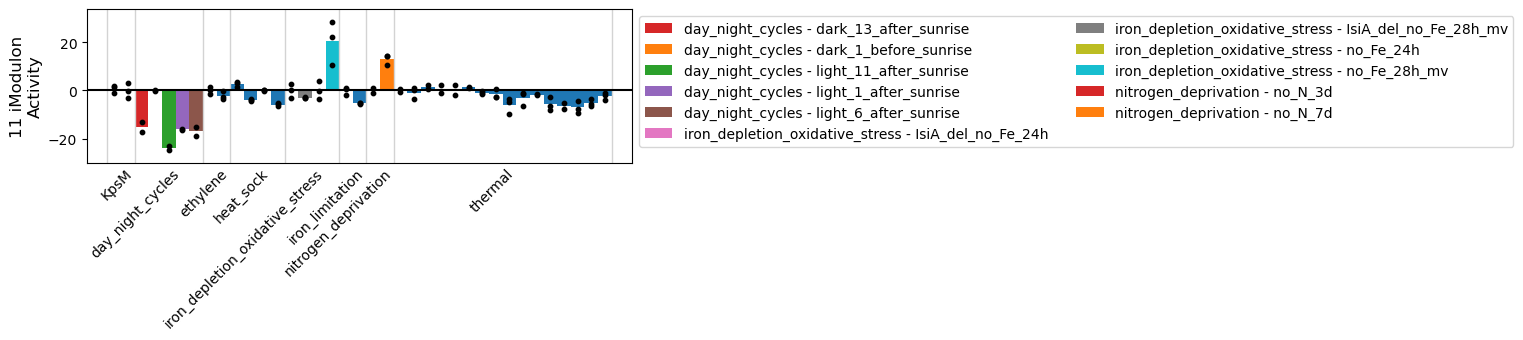

In [32]:
imodulon_id = 11
features = ['COG', 'operon']
to_highligth = ['day_night_cycles', 'iron_depletion_oxidative_stress', 'nitrogen_deprivation']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=6)

The COG composition, along with the activity patterns found, suggest that this iModulon is related with a response of the cell to scarcity conditions, so I will name this group as **'Stringent response'**, in the category **'Global Stress'**

In [33]:
ica_data.rename_imodulons({11:'Stringent_response'})
ica_data.imodulon_table.loc['Stringent_response','category'] = 'Global_stress'

### iModulon 12 : Ethylene response

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Inorganic ion transport and metabolism,5
Transcription,4
"Intracellular trafficking, secretion, and vesicular transport",3
Cell wall/membrane/envelope biogenesis,3
Cell motility,3
"Replication, recombination and repair",2
Signal transduction mechanisms,2
"Cell cycle control, cell division, chromosome partitioning",1
"Secondary metabolites biosynthesis, transport, and catabolism",1
"Translation, ribosomal structure and biogenesis",1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS14760,-0.084149,SGL_RS14760,NC_000911.1,slr0895,2763170,2763733,+,TetR/AcrR family transcriptional regulator,Transcription,NaN,Op1690
SGL_RS11355,-0.060662,acr3,NC_000911.1,slr0944,2010218,2011369,+,arsenite efflux transporter Acr3,"Intracellular trafficking, secretion, and vesi...",A0A6P1VJN9_9SYNC,Op2241
SGL_RS16100,-0.054338,SGL_RS16100,NC_000911.1,slr0798,3061357,3063522,+,heavy metal translocating P-type ATPase,Inorganic ion transport and metabolism,A0A6P1VJL4_9SYNC,Op2359
SGL_RS06315,-0.044781,SGL_RS06315,NC_000911.1,sll1726,946522,947511,-,phosphotransferase,Cell wall/membrane/envelope biogenesis,NaN,Op359
SGL_RS05370,-0.043632,SGL_RS05370,NC_000911.1,slr2010,751034,751426,+,Na+/H+ antiporter subunit E,Inorganic ion transport and metabolism,A0A6P1VI10_9SYNC,Op180
SGL_RS07545,0.049641,SGL_RS07545,NC_000911.1,sll1771,1219654,1220418,-,serine/threonine-protein phosphatase,Signal transduction mechanisms,NaN,Op818
SGL_RS16190,0.053712,SGL_RS16190,NC_000911.1,sll0776,3082151,3083668,-,protein kinase,Transcription,NaN,Op129
SGL_RS11695,0.059637,SGL_RS11695,NC_000911.1,slr0442,2080885,2082720,+,hypothetical protein,Cell motility,NaN,Op1840
SGL_RS12540,0.059857,SGL_RS12540,NC_000911.1,sll0306,2269126,2270163,-,RNA polymerase sigma factor%2C RpoD/SigA family,Transcription,NaN,Op393
SGL_RS17140,0.060371,SGL_RS17140,NC_000911.1,slr1452,3298326,3299384,+,sulfate ABC transporter substrate-binding protein,Inorganic ion transport and metabolism,NaN,Op1014


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op941,2
Op1076,2
Op818,2
Op2206,2
Op1453,2
Op1014,2
Op142,2
Op1274,1
Op1690,1
Op996,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS01610,-0.060284,SGL_RS01610,NC_005232.1,sll6053,51986,53401,-,ThiF family adenylyltransferase,No COG annotation,NaN,Op142
SGL_RS00810,-0.051224,SGL_RS00810,NC_005230.1,ssr7040,36597,36848,+,AbrB/MazE/SpoVT family DNA-binding domain-cont...,No COG annotation,NaN,Op1076
SGL_RS01615,-0.049922,SGL_RS01615,NC_005232.1,sll6054,53398,53778,-,E2/UBC family protein,No COG annotation,NaN,Op142
SGL_RS00815,-0.047807,SGL_RS00815,NC_005230.1,slr7041,36839,37201,+,type II toxin-antitoxin system PemK/MazF famil...,No COG annotation,NaN,Op1076
SGL_RS00170,-0.045386,chrA,NC_005229.1,slr5038,36906,38144,+,chromate efflux transporter,No COG annotation,NaN,Op1453
SGL_RS00165,-0.043455,SGL_RS00165,NC_005229.1,slr5037,36483,36866,+,DUF302 domain-containing protein,No COG annotation,NaN,Op1453
SGL_RS07545,0.049641,SGL_RS07545,NC_000911.1,sll1771,1219654,1220418,-,serine/threonine-protein phosphatase,Signal transduction mechanisms,NaN,Op818
SGL_RS12865,0.052623,SGL_RS12865,NC_000911.1,slr0361,2345797,2346546,+,pseudouridine synthase,"Translation, ribosomal structure and biogenesis",NaN,Op941
SGL_RS12870,0.054944,SGL_RS12870,NC_000911.1,slr0362,2346573,2347127,+,YqeG family HAD IIIA-type phosphatase,Function unknown,NaN,Op941
SGL_RS17140,0.060371,SGL_RS17140,NC_000911.1,slr1452,3298326,3299384,+,sulfate ABC transporter substrate-binding protein,Inorganic ion transport and metabolism,NaN,Op1014


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

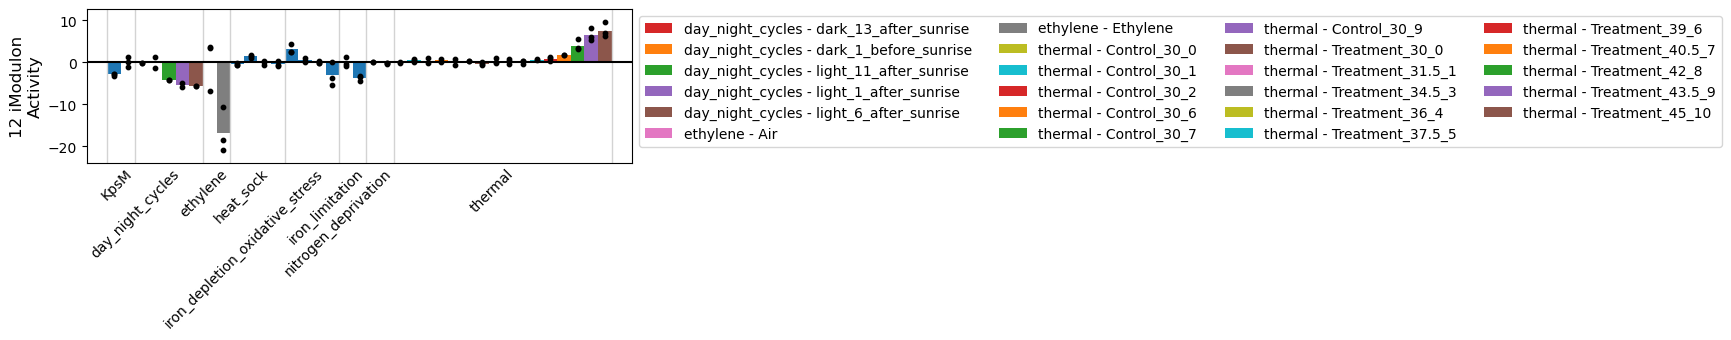

In [34]:
imodulon_id = 12
features = ['COG', 'operon']
to_highligth = ['day_night_cycles', 'ethylene', 'thermal']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=2)

According to the paper in which carried out the *'ethylene'* study, the application of ethylene cause a expression decrease in cell envelope genes, which is consistent with the COG composition and the activity levels showed for this iModulon. Hence, I will name this group as **'Ethylene response'**, in the category **'functional'**.

In [35]:
ica_data.rename_imodulons({12:'Ethylene_response'})
ica_data.imodulon_table.loc['Ethylene_response','category'] = 'functional'

### iModulon 13 : Photosynthesis Via Phycocyanin

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Nucleotide transport and metabolism,5
Signal transduction mechanisms,5
Energy production and conversion,5
"Post-translational modification, protein turnover, and chaperones",5
Transcription,3
Coenzyme transport and metabolism,3
Amino acid transport and metabolism,2
Inorganic ion transport and metabolism,2
"Translation, ribosomal structure and biogenesis",2
"Replication, recombination and repair",1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS04010,-0.094500,SGL_RS04010,NC_000911.1,slr1594,451735,452922,+,response regulator,Signal transduction mechanisms,NaN,Op1913
SGL_RS04005,-0.070741,SGL_RS04005,NC_000911.1,slr1593,450740,451651,+,cyclic diguanylate phosphodiesterase,Signal transduction mechanisms,NaN,Op2555
SGL_RS17750,-0.064906,SGL_RS17750,NC_000911.1,slr0756,3433362,3434261,+,circadian clock protein KaiA,"Translation, ribosomal structure and biogenesis",NaN,Op2306
SGL_RS06170,-0.052490,groL,NC_000911.1,slr2076,915721,917346,+,chaperonin GroEL,"Post-translational modification, protein turno...",NaN,Op1979
SGL_RS06165,-0.051973,groES,NC_000911.1,slr2075,915313,915624,+,co-chaperone GroES,"Post-translational modification, protein turno...",A0A6P1VJ50_9SYNC,Op1896
SGL_RS04340,-0.045660,glnA,NC_000911.1,slr1756,531446,532867,+,type I glutamate--ammonia ligase,Amino acid transport and metabolism,A0A6P1VBQ4_9SYNC,Op445
SGL_RS05150,0.040282,SGL_RS05150,NC_000911.1,sll1286,705307,706017,-,TetR/AcrR family transcriptional regulator,Transcription,NaN,Op912
SGL_RS06985,0.040743,ribH,NC_000911.1,sll1282,1094649,1095143,-,6%2C7-dimethyl-8-ribityllumazine synthase,Coenzyme transport and metabolism,NaN,Op786
SGL_RS04385,0.042970,SGL_RS04385,NC_000911.1,sll1641,543468,544871,-,glutamate decarboxylase,Amino acid transport and metabolism,NaN,Op1696
SGL_RS03080,0.043593,SGL_RS03080,NC_000911.1,slr1793,260463,261638,+,transaldolase,Nucleotide transport and metabolism,NaN,Op1096


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op326,2
Op219,2
Op709,2
Op527,2
Op2097,2
...,...
Op1577,1
Op415,1
Op980,1
Op2555,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS08335,0.044874,SGL_RS08335,NC_000911.1,sll1162,1380085,1380792,-,DUF4079 domain-containing protein,Function unknown,NaN,Op219
SGL_RS08330,0.045138,SGL_RS08330,NC_000911.1,sll1163,1379715,1380068,-,cupin domain-containing protein,Function unknown,NaN,Op219
SGL_RS09835,0.046787,rsmI,NC_000911.1,sll0818,1691493,1692332,-,16S rRNA (cytidine(1402)-2'-O)-methyltransferase,"Translation, ribosomal structure and biogenesis",NaN,Op2097
SGL_RS10195,0.052638,SGL_RS10195,NC_000911.1,sll1899,1757592,1758542,-,heme o synthase,"Post-translational modification, protein turno...",NaN,Op709
SGL_RS09840,0.059217,SGL_RS09840,NC_000911.1,ssl1520,1692332,1692559,-,hypothetical protein,No COG annotation,NaN,Op2097
SGL_RS05545,0.067002,ctaD,NC_000911.1,slr1137,791806,793461,+,cytochrome c oxidase subunit I,Energy production and conversion,NaN,Op527
SGL_RS05245,0.069343,cpcA,NC_000911.1,sll1578,726349,726837,-,phycocyanin subunit alpha,Energy production and conversion,A0A6P1VE95_9SYNC,Op326
SGL_RS05250,0.073364,SGL_RS05250,NC_000911.1,sll1577,726948,727466,-,phycocyanin subunit beta,Energy production and conversion,A0A6P1VE44_9SYNC,Op326
SGL_RS05540,0.091597,SGL_RS05540,NC_000911.1,slr1136,790719,791717,+,cytochrome c oxidase subunit II,Energy production and conversion,NaN,Op527
SGL_RS10200,0.092337,SGL_RS10200,NC_000911.1,sll1898,1758693,1759634,-,heme A synthase,"Post-translational modification, protein turno...",NaN,Op709


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
4,13,map00196,0.000026,0.005535,0.052083,0.333333,0.090090,5.0,15.0,96.0,KEGG pathways,Photosynthesis - antenna proteins,NaN
8,13,M00155,0.000323,0.069344,0.031250,0.500000,0.058824,3.0,6.0,96.0,KEGG modules,NaN,"Cytochrome c oxidase, prokaryotes"
10,13,M00004,0.001280,0.091698,0.031250,0.333333,0.057143,3.0,9.0,96.0,KEGG modules,NaN,Pentose phosphate pathway (Pentose phosphate c...
9,13,M00154,0.000670,0.072023,0.020833,1.000000,0.040816,2.0,2.0,96.0,KEGG modules,NaN,Cytochrome c oxidase


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

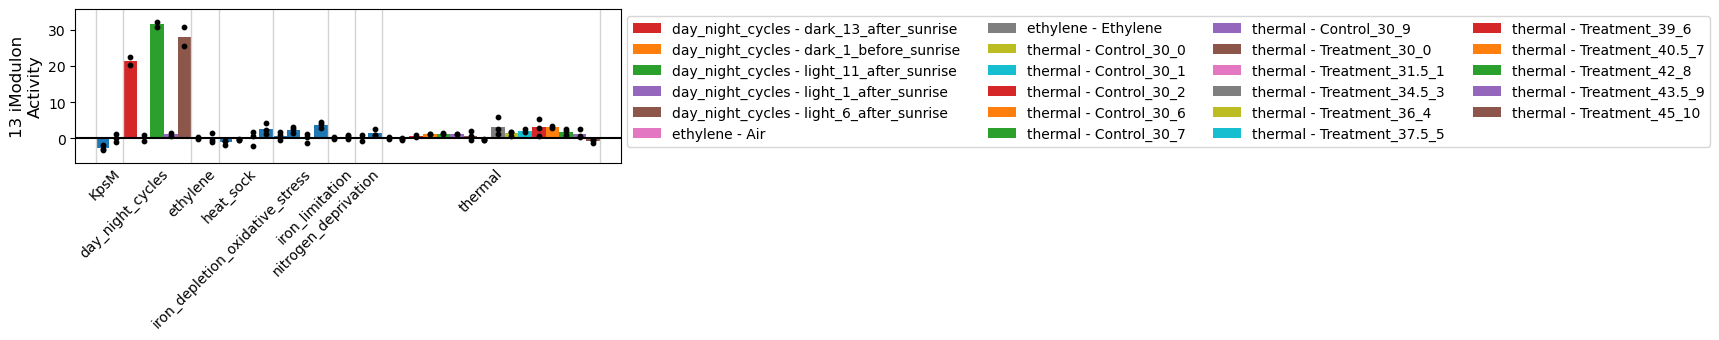

In [36]:
imodulon_id = 13
to_highligth = ['day_night_cycles', 'ethylene', 'thermal']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=2)

The annotation of genes, along with enrichment results and activity patterns give enough evidence to name this iModulon as **'Photosynthesis Via Phycocyanin'**, in the category **'Photosinthetic response'**.

In [37]:
ica_data.rename_imodulons({13:'Photosinthesis_via_phycocyanin'})
ica_data.imodulon_table.loc['Photosinthesis_via_phycocyanin','category'] = 'Photosynthetic_response'

### iModulon 14 : Nitrogen uptake

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Amino acid transport and metabolism,4
Inorganic ion transport and metabolism,4
"Intracellular trafficking, secretion, and vesicular transport",2
Coenzyme transport and metabolism,1
Transcription,1
Signal transduction mechanisms,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS06600,0.073673,SGL_RS06600,NC_000911.1,sll1634,1010710,1011759,-,anthranilate phosphoribosyltransferase family ...,Amino acid transport and metabolism,NaN,Op731
SGL_RS06015,0.074690,urtC,NC_000911.1,slr1201,883287,884519,+,urea ABC transporter permease subunit UrtC,Amino acid transport and metabolism,NaN,Op825
SGL_RS14780,0.080062,cynS,NC_000911.1,slr0899,2770857,2771306,+,cyanase,Inorganic ion transport and metabolism,NaN,Op665
SGL_RS04340,0.087013,glnA,NC_000911.1,slr1756,531446,532867,+,type I glutamate--ammonia ligase,Amino acid transport and metabolism,A0A6P1VBQ4_9SYNC,Op445
SGL_RS06590,0.093780,ntrB,NC_000911.1,sll1451,1008321,1009148,-,nitrate ABC transporter permease,Inorganic ion transport and metabolism,NaN,Op2592
SGL_RS03810,0.095053,SGL_RS03810,NC_000911.1,sll1017,400720,402048,-,ammonium transporter,"Intracellular trafficking, secretion, and vesi...",NaN,Op1457
SGL_RS16900,0.100243,SGL_RS16900,NC_000911.1,sll0536,3242711,3243781,-,potassium channel protein,"Intracellular trafficking, secretion, and vesi...",NaN,Op923
SGL_RS06010,0.138554,SGL_RS06010,NC_000911.1,slr1200,882023,883189,+,branched-chain amino acid ABC transporter perm...,Amino acid transport and metabolism,NaN,Op2149
SGL_RS14775,0.216151,SGL_RS14775,NC_000911.1,slr0898,2769125,2770633,+,ferredoxin--nitrite reductase,Inorganic ion transport and metabolism,NaN,Op1174
SGL_RS06595,0.222172,SGL_RS06595,NC_000911.1,sll1450,1009234,1010574,-,CmpA/NrtA family ABC transporter substrate-bin...,Inorganic ion transport and metabolism,A0A6P1VG38_9SYNC,Op310


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op173,2
Op1457,1
Op445,1
Op845,1
Op923,1
Op1758,1
Op2522,1
Op665,1
Op1174,1
Op337,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS12995,0.076974,SGL_RS12995,NC_000911.1,sll0327,2389481,2389900,-,hypothetical protein,Function unknown,NaN,Op173
SGL_RS12990,0.077903,SGL_RS12990,NC_000911.1,sll0328,2389062,2389481,-,hypothetical protein,No COG annotation,NaN,Op173


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
5,14,map00910,3.164213e-10,6.676489e-08,0.230769,0.400000,0.292683,6.0,15.0,26.0,KEGG pathways,Nitrogen metabolism,NaN
11,14,M00323,3.078404e-06,6.618568e-04,0.115385,0.600000,0.193548,3.0,5.0,26.0,KEGG modules,NaN,Urea transport system
7,14,map04724,1.426302e-04,1.498222e-02,0.076923,0.666667,0.137931,2.0,3.0,26.0,KEGG pathways,Glutamatergic synapse,NaN
8,14,map04727,2.840232e-04,1.498222e-02,0.076923,0.500000,0.133333,2.0,4.0,26.0,KEGG pathways,GABAergic synapse,NaN
12,14,M00438,2.840232e-04,3.053249e-02,0.076923,0.500000,0.133333,2.0,4.0,26.0,KEGG modules,NaN,Nitrate/nitrite transport system
9,14,map04217,4.713197e-04,1.988969e-02,0.076923,0.400000,0.129032,2.0,5.0,26.0,KEGG pathways,Necroptosis,NaN
6,14,map02010,2.448962e-04,1.498222e-02,0.192308,0.059524,0.090909,5.0,84.0,26.0,KEGG pathways,ABC transporters,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

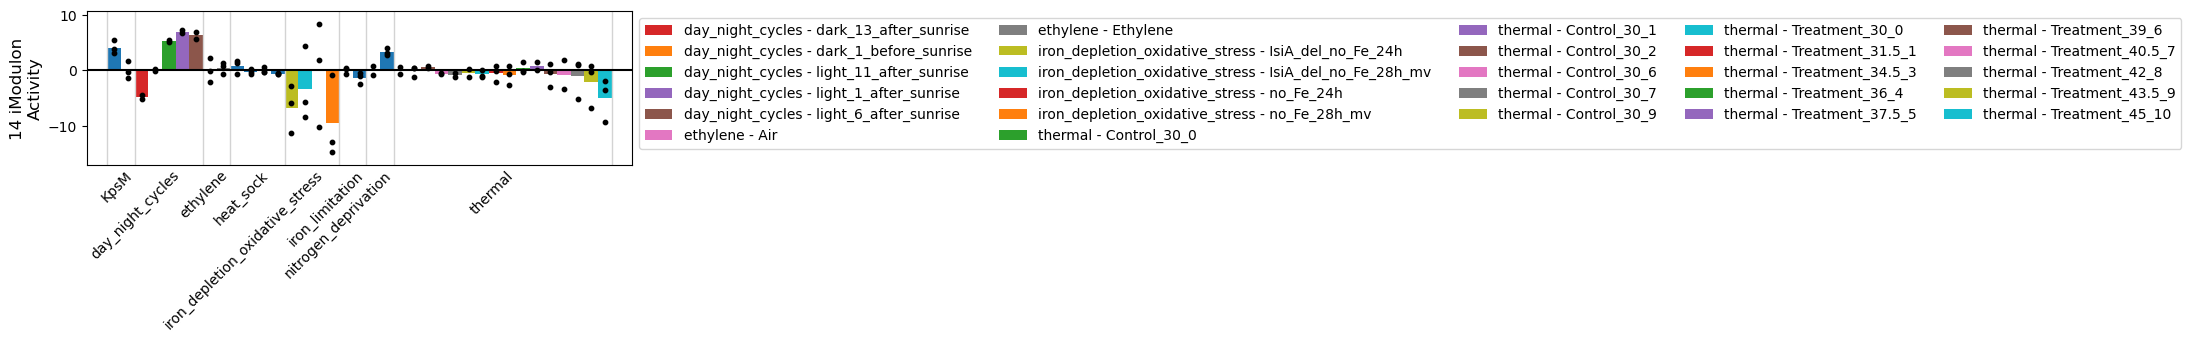

In [38]:
imodulon_id =14
to_highligth = ['day_night_cycles', 'ethylene', 'thermal', 'iron_depletion_oxidative_stress']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=2)

COG composition, gene annotation and enrichment strongly suggest that this iModulon is implicated in the nitrogen uptake system of synechocystis. Consequently, I will name this group as **'Nitrogen Uptake'**, within the group **'Nitrogen Metabolism'**.

In [39]:
ica_data.rename_imodulons({14 : 'Nitrogen_uptake' })
ica_data.imodulon_table.loc['Nitrogen_uptake', 'category'] = 'Nitrogen_metabolism'

### iModulon 15 : Electron transfer via photosystem II

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Energy production and conversion,15
"Intracellular trafficking, secretion, and vesicular transport",10
"Replication, recombination and repair",8
"Translation, ribosomal structure and biogenesis",8
Nucleotide transport and metabolism,7
Amino acid transport and metabolism,7
"Post-translational modification, protein turnover, and chaperones",6
Signal transduction mechanisms,6
Carbohydrate transport and metabolism,4
Inorganic ion transport and metabolism,4


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS13045,-0.088154,SGL_RS13045,NC_000911.1,sll0771,2399210,2400616,-,sugar porter family MFS transporter,"Intracellular trafficking, secretion, and vesi...",NaN,Op2449
SGL_RS19120,-0.081570,SGL_RS19120,NC_000911.1,NaN,3140045,3140164,-,photosystem II reaction center protein Ycf12,"Intracellular trafficking, secretion, and vesi...",A0A6P1VN22_9SYNC,NaN
SGL_RS19550,-0.050529,SGL_RS19550,NC_000911.1,NaN,226928,227098,+,hypothetical protein,Amino acid transport and metabolism,NaN,NaN
SGL_RS04465,-0.049743,hisD,NC_000911.1,slr1848,555642,556946,+,histidinol dehydrogenase,Amino acid transport and metabolism,NaN,Op883
SGL_RS04180,-0.048150,cobB,NC_000911.1,sll1501,484799,486247,-,hydrogenobyrinic acid a%2Cc-diamide synthase (...,Nucleotide transport and metabolism,NaN,Op130
SGL_RS02705,-0.046126,SGL_RS02705,NC_000911.1,sll1321,177592,178098,-,ATP synthase subunit I,"Intracellular trafficking, secretion, and vesi...",NaN,Op1155
SGL_RS02790,-0.045548,SGL_RS02790,NC_000911.1,slr1098,194877,195617,+,HEAT repeat domain-containing protein,Energy production and conversion,NaN,Op323
SGL_RS15330,-0.044078,hisH,NC_000911.1,slr0084,2890566,2891198,+,imidazole glycerol phosphate synthase subunit ...,Amino acid transport and metabolism,NaN,Op1219
SGL_RS05875,-0.042717,SGL_RS05875,NC_000911.1,sll1796,845966,846328,-,c-type cytochrome,Energy production and conversion,A0A6P1VES6_9SYNC,Op631
SGL_RS02890,-0.042220,SGL_RS02890,NC_000911.1,sll1029,219206,219517,-,BMC domain-containing protein,Energy production and conversion,A0A6P1VBW4_9SYNC,Op1619


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op368,2
Op1346,2
Op850,2
Op2043,2
Op79,2
...,...
Op136,1
Op1017,1
Op243,1
Op126,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
10,15,map00195,0.000137,0.028955,0.053571,0.206897,0.085106,12.0,58.0,224.0,KEGG pathways,Photosynthesis,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

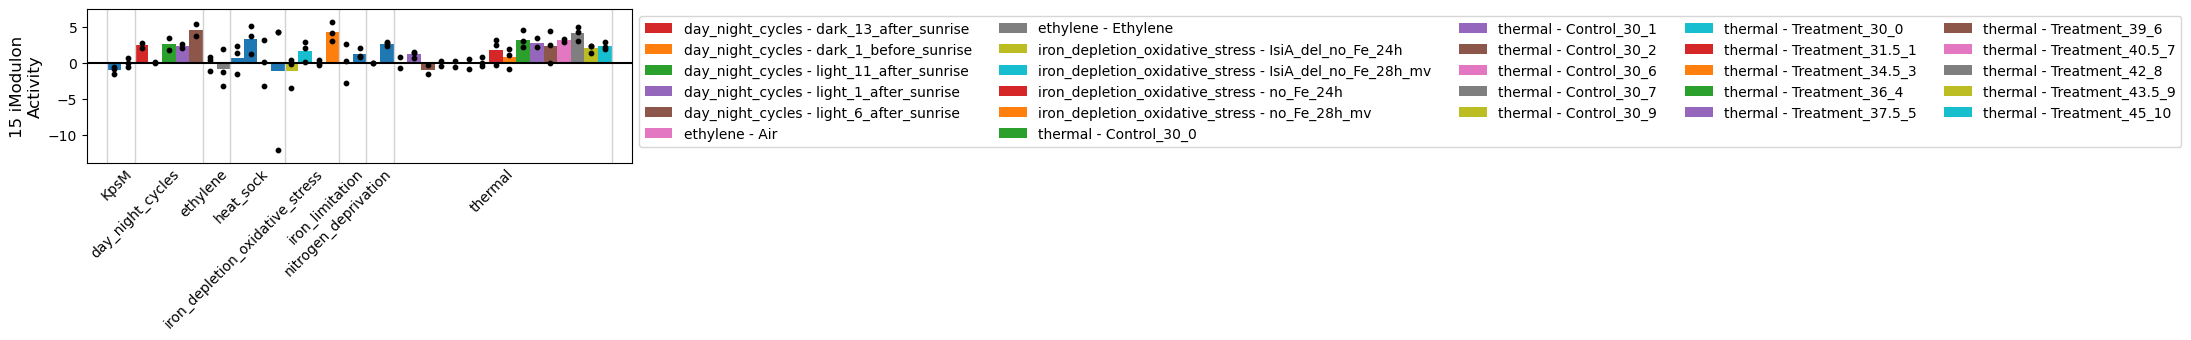

In [40]:
imodulon_id = 15
to_highligth = ['day_night_cycles', 'ethylene', 'thermal', 'iron_depletion_oxidative_stress']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=7)

According to the COG composition, gene annotation an enrichment result I have decided to name this iModulon **'Electron transfer via Photosystem II'**, within the category **'Photosynthetic response'**.

In [41]:
ica_data.rename_imodulons({15 : 'Photosynthesis_via_Photosystem_II' })
ica_data.imodulon_table.loc['Photosynthesis_via_Photosystem_II', 'category'] = 'Photosynthetic_response'

### iModulon 16 : Darkness response via Hydrogenases

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Energy production and conversion,14
Nucleotide transport and metabolism,10
Signal transduction mechanisms,7
Carbohydrate transport and metabolism,7
"Intracellular trafficking, secretion, and vesicular transport",3
"Secondary metabolites biosynthesis, transport, and catabolism",3
"Translation, ribosomal structure and biogenesis",3
Amino acid transport and metabolism,3
Inorganic ion transport and metabolism,3
"Post-translational modification, protein turnover, and chaperones",3


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS16070,-0.058696,SGL_RS16070,NC_000911.1,slr0795,3055016,3055699,+,glycoside hydrolase family protein,Carbohydrate transport and metabolism,NaN,Op421
SGL_RS03225,-0.053671,SGL_RS03225,NC_000911.1,slr1291,286164,287843,+,NAD(P)H-quinone oxidoreductase subunit 4,Energy production and conversion,NaN,Op2580
SGL_RS05875,-0.050878,SGL_RS05875,NC_000911.1,sll1796,845966,846328,-,c-type cytochrome,Energy production and conversion,A0A6P1VES6_9SYNC,Op631
SGL_RS14780,-0.046896,cynS,NC_000911.1,slr0899,2770857,2771306,+,cyanase,Inorganic ion transport and metabolism,NaN,Op665
SGL_RS14790,-0.044420,moaA,NC_000911.1,slr0901,2772470,2773453,+,GTP 3'%2C8-cyclase MoaA,Nucleotide transport and metabolism,NaN,Op665
SGL_RS18370,-0.040260,SGL_RS18370,NC_000911.1,slr0607,3569134,3569523,+,cyclic nucleotide-binding domain-containing pr...,Signal transduction mechanisms,NaN,Op766
SGL_RS05350,-0.039739,SGL_RS05350,NC_000911.1,slr2006,747234,747578,+,NADH-quinone oxidoreductase subunit K,Inorganic ion transport and metabolism,A0A6P1VFD3_9SYNC,Op1564
SGL_RS11955,-0.039322,gcvP,NC_000911.1,slr0293,2134202,2137153,+,aminomethyl-transferring glycine dehydrogenase,Amino acid transport and metabolism,NaN,Op2404
SGL_RS16065,-0.039208,SGL_RS16065,NC_000911.1,slr0794,3051772,3054936,+,CusA/CzcA family heavy metal efflux RND transp...,Inorganic ion transport and metabolism,NaN,Op421
SGL_RS09665,-0.039082,ahcY,NC_000911.1,sll1234,1658511,1659788,-,adenosylhomocysteinase,Nucleotide transport and metabolism,A0A6P1VJ45_9SYNC,Op1313


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op1041,4
Op895,4
Op244,3
Op808,2
Op525,2
...,...
Op1311,1
Op2527,1
Op209,1
Op1395,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS06820,0.035395,SGL_RS06820,NC_000911.1,slr1240,1055574,1056113,+,hypothetical protein,No COG annotation,NaN,Op895
SGL_RS16410,0.039625,SGL_RS16410,NC_000911.1,sll0743,3127364,3127846,-,DUF29 domain-containing protein,Signal transduction mechanisms,NaN,Op244
SGL_RS09755,0.044627,hoxF,NC_000911.1,sll1221,1676366,1677967,-,bidirectional NAD-reducing hydrogenase diaphor...,Energy production and conversion,NaN,Op1041
SGL_RS09760,0.047421,hoxE,NC_000911.1,sll1220,1678044,1678565,-,bidirectional hydrogenase complex protein HoxE,Energy production and conversion,NaN,Op1041
SGL_RS06825,0.047533,SGL_RS06825,NC_000911.1,slr1241,1056119,1056466,+,nucleotidyltransferase family protein,No COG annotation,NaN,Op895
SGL_RS09750,0.048769,SGL_RS09750,NC_000911.1,sll1222,1675687,1676325,-,Uma2 family endonuclease,Function unknown,NaN,Op1041
SGL_RS09745,0.049071,hoxU,NC_000911.1,sll1223,1674944,1675660,-,bidirectional hydrogenase complex protein HoxU,Energy production and conversion,NaN,Op1041
SGL_RS06835,0.049262,SGL_RS06835,NC_000911.1,ssr2067,1056720,1056944,+,type II toxin-antitoxin system HicB family ant...,Function unknown,NaN,Op895
SGL_RS16405,0.051496,SGL_RS16405,NC_000911.1,sll0744,3126311,3127342,-,dihydroorotate dehydrogenase-like protein,Nucleotide transport and metabolism,NaN,Op244
SGL_RS16415,0.052952,SGL_RS16415,NC_000911.1,sll0742,3127864,3128313,-,DUF29 domain-containing protein,Signal transduction mechanisms,NaN,Op244


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

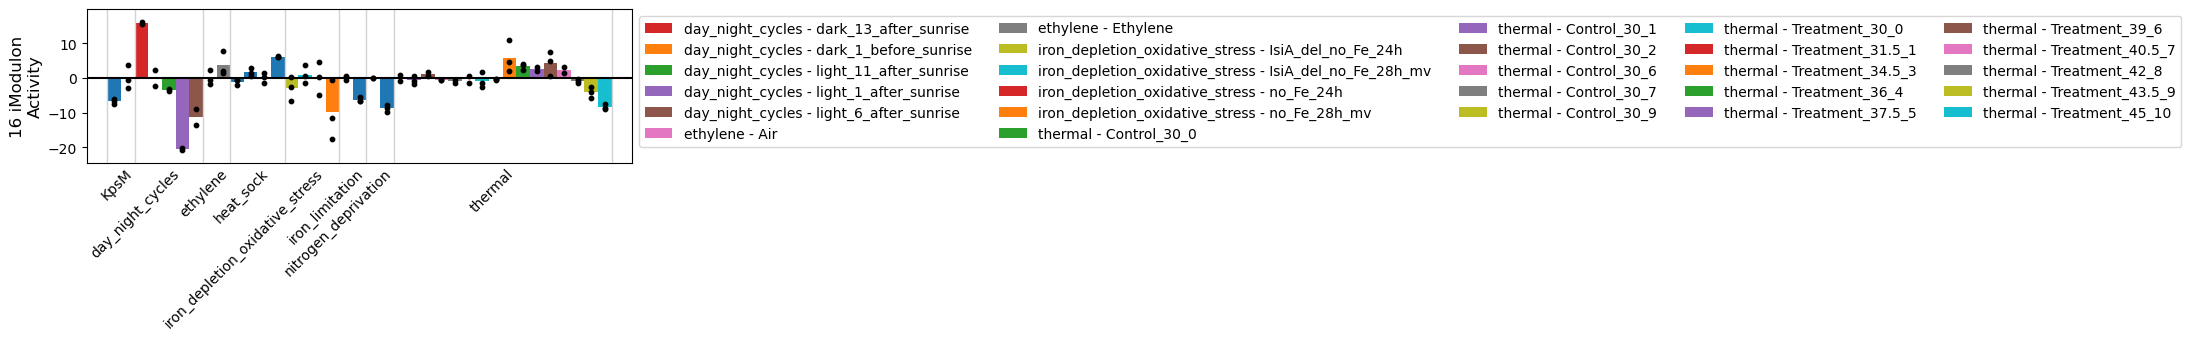

In [42]:
imodulon_id = 16
to_highligth = ['day_night_cycles', 'ethylene', 'thermal', 'iron_depletion_oxidative_stress']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

Although this iModulon has annotation concerning the photosystem I, it alsa has a much richer anotations in hydrogenases an dehydrogenases. Those proteins has been identified as essential for Synechosystis aerobic growth in darkness, which is consistent with the activity values of **'day_night_cyles'** study. Altogether, It suggests an adaptation response to darkness in which the photosystem I is implicated. So I named this iModulon as **'Darkness response via Hydrogenases'**, wich is included in the category **'Lght response'**

In [43]:
ica_data.rename_imodulons({16:'Darkness_response_via_hydrogenase'})
ica_data.imodulon_table.loc['Darkness_response_via_hydrogenase', 'category'] = 'Light_response'

### iModulon 17 : Photosynthesis via Photosystems

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Energy production and conversion,15
"Intracellular trafficking, secretion, and vesicular transport",6
Carbohydrate transport and metabolism,4
"Post-translational modification, protein turnover, and chaperones",3
"Translation, ribosomal structure and biogenesis",2
Inorganic ion transport and metabolism,2
Coenzyme transport and metabolism,2
RNA processing and modification,1
Lipid transport and metabolism,1
Nucleotide transport and metabolism,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS10960,-0.058104,SGL_RS10960,NC_000911.1,ssl2153,1922791,1923114,-,RpiB/LacA/LacB family sugar-phosphate isomerase,Carbohydrate transport and metabolism,A0A6P1VHR7_9SYNC,Op1739
SGL_RS04660,0.051340,SGL_RS04660,NC_000911.1,slr2051,596498,597247,+,phycobilisome rod-core linker polypeptide,Carbohydrate transport and metabolism,NaN,Op2642
SGL_RS02695,0.054088,atpE,NC_000911.1,ssl2615,176256,176501,-,ATP synthase F0 subunit C,Energy production and conversion,A0A6P1VE18_9SYNC,Op284
SGL_RS08525,0.054988,aqpZ,NC_000911.1,slr2057,1412923,1413666,+,aquaporin Z,"Intracellular trafficking, secretion, and vesi...",NaN,Op898
SGL_RS12620,0.055197,psaC,NC_000911.1,ssl0563,2287334,2287579,-,photosystem I iron-sulfur center protein PsaC,Energy production and conversion,PSAC_GLOC7;A0A2H6L5A4_MICAE;A0A8J7JCZ0_9CYAN;A...,Op685
SGL_RS13610,0.056229,petE,NC_000911.1,sll0199,2525827,2526207,-,plastocyanin,Energy production and conversion,A0A6P1VJV7_9SYNC,Op858
SGL_RS16825,0.057036,psbD,NC_000911.1,slr0927,3229780,3230838,+,photosystem II D2 protein (photosystem q(a) pr...,Energy production and conversion,NaN,Op2203
SGL_RS17825,0.058951,SGL_RS17825,NC_000911.1,smr0004,3458023,3458145,+,photosystem I reaction center subunit VIII,"Intracellular trafficking, secretion, and vesi...",A0A6P1VJ78_9SYNC,Op1675
SGL_RS11935,0.059101,psbV,NC_000911.1,sll0258,2131616,2132098,-,photosystem II cytochrome c-550,Energy production and conversion,NaN,Op1819
SGL_RS08205,0.059321,psbD,NC_000911.1,sll0849,1348840,1349898,-,photosystem II D2 protein (photosystem q(a) pr...,Energy production and conversion,NaN,Op946


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op2395,2
Op946,2
Op257,2
Op326,2
Op525,2
Op846,1
Op692,1
Op1145,1
Op1739,1
Op804,1


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
11,17,map00195,1.855171e-23,3.914412e-21,0.313433,0.362069,0.336000,21.0,58.0,67.0,KEGG pathways,Photosynthesis,NaN
12,17,map00196,5.444976e-15,5.744450e-13,0.149254,0.666667,0.243902,10.0,15.0,67.0,KEGG pathways,Photosynthesis - antenna proteins,NaN
13,17,M00161,2.299900e-09,4.944786e-07,0.089552,0.666667,0.157895,6.0,9.0,67.0,KEGG modules,NaN,Photosystem II
14,17,M00163,1.004887e-08,1.080253e-06,0.074627,0.833333,0.136986,5.0,6.0,67.0,KEGG modules,NaN,Photosystem I
13,17,map01100,6.931914e-12,4.875446e-10,0.507463,0.060391,0.107937,34.0,563.0,67.0,KEGG pathways,Metabolic pathways,NaN
7,17,plasma membrane-derived thylakoid photosystem II,6.278898e-05,5.468920e-02,0.059701,0.307692,0.100000,4.0,16.0,67.0,GO,NaN,NaN
15,17,M00165,6.278898e-05,4.499877e-03,0.059701,0.307692,0.100000,4.0,13.0,67.0,KEGG modules,NaN,Reductive pentose phosphate cycle (Calvin cycle)
14,17,map00710,2.509130e-04,1.323566e-02,0.059701,0.222222,0.094118,4.0,18.0,67.0,KEGG pathways,Carbon fixation in photosynthetic organisms,NaN


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

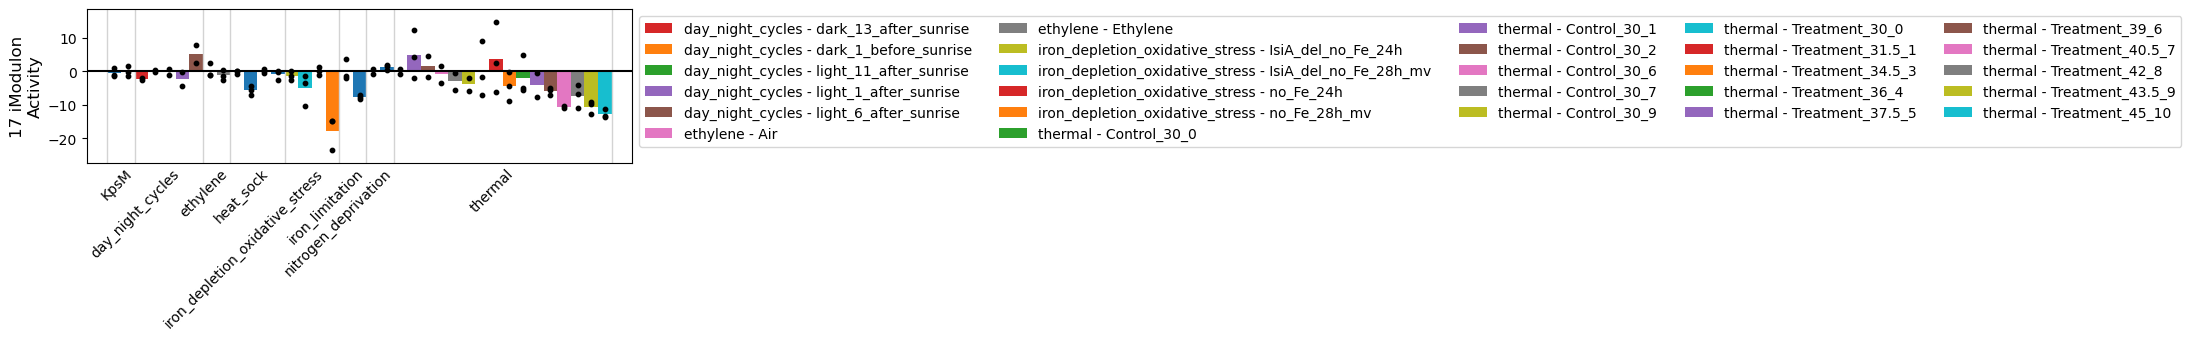

In [44]:
imodulon_id = 17
to_highligth = ['day_night_cycles', 'ethylene', 'thermal', 'iron_depletion_oxidative_stress']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

This imModulon clearly reflects the photosynthesis via both photosystems, so I have renamed iModuln 15 as **'Electron transfer via Photosystem II'**, being now the presetn one **'Photosynthesis via Photosystems'**. Both groups are included in **'Photosynthetic response'**.

In [45]:
ica_data.rename_imodulons({'Photosynthesis_via_Photosystem_II' : 'Electron_transfer_via_Photosystem_II',
                           17 : 'Photosynthesis_via_Photosystems'})

ica_data.imodulon_table.loc['Photosynthesis_via_Photosystems', 'category'] = 'Photosynthetic_response'

### iModulon 18 : Unknown 3

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op987,2
Op1531,1
Op2211,1
Op177,1
Op1885,1
Op1621,1
Op2299,1
Op1217,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS00255,0.137395,SGL_RS00255,NC_005229.1,slr5056,54911,56281,+,glycosyltransferase family 2 protein,No COG annotation,NaN,Op987
SGL_RS00250,0.181122,SGL_RS00250,NC_005229.1,slr5055,54119,54910,+,WecB/TagA/CpsF family glycosyltransferase,No COG annotation,NaN,Op987


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

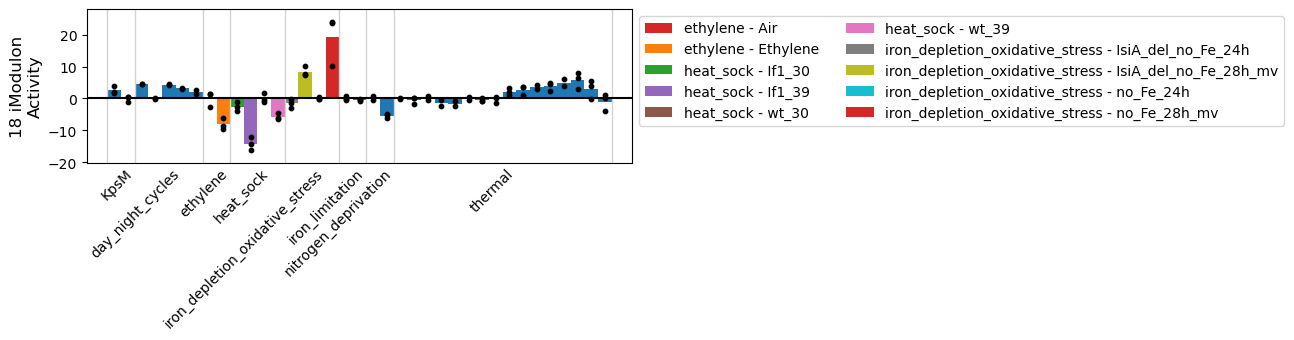

In [46]:
imodulon_id = 18
to_highligth = ['heat_sock', 'ethylene', 'iron_depletion_oxidative_stress']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth, show_threshold=2)

Tis iModulon has not enough annotation nor enrichment data to infer any classification category. Only the activity pàtterns suggest it is related with stress responses. With all this. I will name this iModulon as **'Unknown 3'**.

In [47]:
ica_data.rename_imodulons({18:'Unknown_3'})

### iModulon 19 : Heat response

HTML(value='<b style="font-size:20px">Top COGs in iModulon :</b>')

,COG
Cell wall/membrane/envelope biogenesis,12
"Post-translational modification, protein turnover, and chaperones",11
Energy production and conversion,10
Nucleotide transport and metabolism,9
Amino acid transport and metabolism,8
Inorganic ion transport and metabolism,8
"Replication, recombination and repair",6
Transcription,6
"Translation, ribosomal structure and biogenesis",6
"Intracellular trafficking, secretion, and vesicular transport",6


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS03660,-0.059496,SGL_RS03660,NC_000911.1,slr1071,374646,375452,+,bifunctional 2-polyprenyl-6-hydroxyphenol meth...,Coenzyme transport and metabolism,NaN,Op195
SGL_RS17600,-0.058085,SGL_RS17600,NC_000911.1,sll1471,3403557,3404306,-,phycobilisome rod-core linker polypeptide,Carbohydrate transport and metabolism,NaN,Op2507
SGL_RS03640,-0.051370,galE,NC_000911.1,slr1067,371487,372509,+,UDP-glucose 4-epimerase GalE,Cell wall/membrane/envelope biogenesis,NaN,Op974
SGL_RS03555,-0.048436,SGL_RS03555,NC_000911.1,slr0985,355424,355993,+,dTDP-4-dehydrorhamnose 3%2C5-epimerase,Cell wall/membrane/envelope biogenesis,NaN,Op733
SGL_RS03665,-0.047899,SGL_RS03665,NC_000911.1,slr1072,375470,376432,+,GDP-mannose 4%2C6-dehydratase,Cell wall/membrane/envelope biogenesis,NaN,Op195
...,...,...,...,...,...,...,...,...,...,...,...
SGL_RS08815,0.057034,SGL_RS08815,NC_000911.1,sll1599,1481380,1482162,-,metal ABC transporter ATP-binding protein,Inorganic ion transport and metabolism,NaN,Op246
SGL_RS18005,0.072276,SGL_RS18005,NC_000911.1,sll0442,3497016,3497351,-,hypothetical protein,Signal transduction mechanisms,NaN,Op118
SGL_RS06030,0.077483,SGL_RS06030,NC_000911.1,slr1204,886283,887542,+,HhoA/HhoB/HtrA family serine endopeptidase,"Post-translational modification, protein turno...",NaN,Op2447
SGL_RS04040,0.080119,SGL_RS04040,NC_000911.1,sll1514,460250,460690,-,Hsp20/alpha crystallin family protein,"Post-translational modification, protein turno...",A0A6P1VDV5_9SYNC,Op1873


HTML(value='<b style="font-size:20px">Top operons in iModulon :</b>')

,operon
Op733,3
Op43,3
Op288,2
Op1401,2
Op665,2
...,...
Op1599,1
Op1785,1
Op1872,1
Op791,1


HTML(value='<b style="font-size:20px">Showing full annotation for larger groups :</b>')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
SGL_RS03600,-0.054590,SGL_RS03600,NC_000911.1,slr1618,363490,364218,+,class I SAM-dependent methyltransferase,No COG annotation,NaN,Op43
SGL_RS03555,-0.048436,SGL_RS03555,NC_000911.1,slr0985,355424,355993,+,dTDP-4-dehydrorhamnose 3%2C5-epimerase,Cell wall/membrane/envelope biogenesis,NaN,Op733
SGL_RS03550,-0.045373,rfbG,NC_000911.1,slr0984,354323,355405,+,CDP-glucose 4%2C6-dehydratase,Carbohydrate transport and metabolism,NaN,Op733
SGL_RS03605,-0.044688,SGL_RS03605,NC_000911.1,slr1619,364421,364996,+,cephalosporin hydroxylase family protein,Defense mechanisms,NaN,Op43
SGL_RS03545,-0.039429,rfbF,NC_000911.1,slr0983,353552,354322,+,glucose-1-phosphate cytidylyltransferase,"Translation, ribosomal structure and biogenesis",NaN,Op733
SGL_RS03595,-0.032003,SGL_RS03595,NC_000911.1,slr1617,362185,363420,+,NAD-dependent epimerase/dehydratase family pro...,No COG annotation,NaN,Op43


HTML(value='<b style="font-size:20px">COG enrinchments in iModulon :</b>')

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,pathway_name,module_name
16,19,M00316,0.000174,0.037437,0.014493,1.0,0.028571,3.0,3.0,207.0,KEGG modules,NaN,Manganese transport system


HTML(value='<b style="font-size:20px">iModulon activities across studied conditions :</b>')

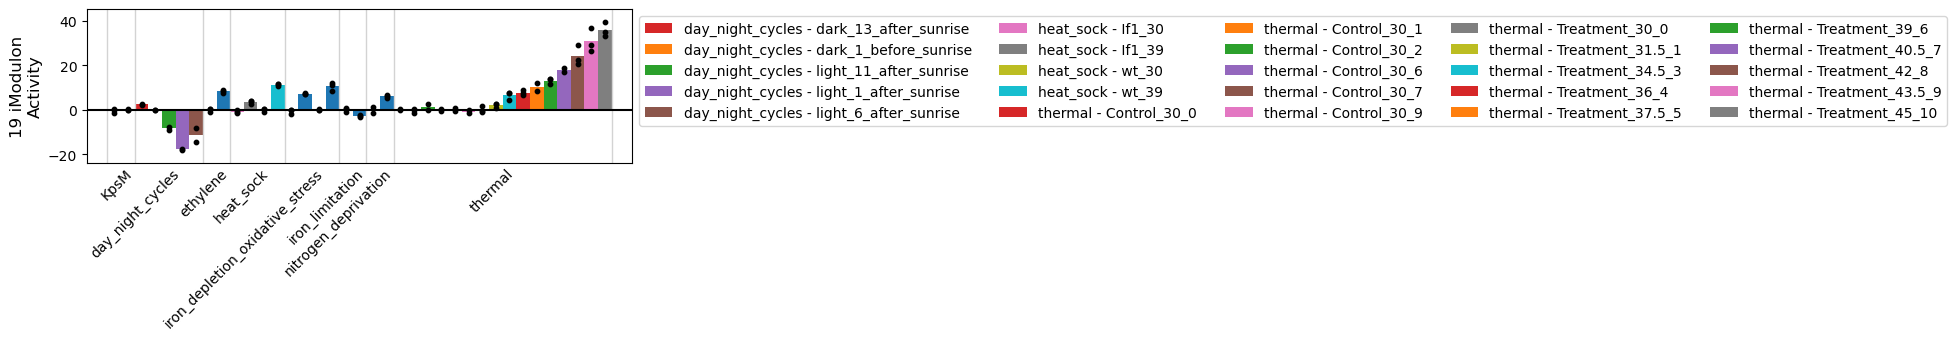

In [48]:
imodulon_id = 19
to_highligth = ['day_night_cycles', 'heat_sock', 'thermal']
show_imodulon_details(imodulon_id, DF_enrichments, features, to_highligth)

The COG composition containing rich annotations in cell wall/envelope biogenesis, consistently with the operon sturctures found and the activity pattern showed with temperatures were sufficient for me to name this iModulon **'Heat response'**, which is included in the **'Global Stress'** category.

In [49]:
ica_data.rename_imodulons({19:'Heat_response'})
ica_data.imodulon_table.loc['Heat_response', 'category'] = 'Global_stress'

In [50]:
ica_data.imodulon_table.loc['oxidative_stress_response', 'category'] = 'Global_stress'

In [51]:
ica_data.imodulon_table

,imodulon_size,explained_variance,category
oxidative_stress_response,64,0.051002,Global_stress
ribosome_biogenesis,67,0.022770,translation
Unknown_1,174,0.003296,uncharacterized
Phosphate_ABC_transport_system,28,0.006637,Element_homeostasis
Metal_related_response_Manganese,14,0.005571,Metal_homeostasis
EPS_secretion_system,317,0.022298,Extracellular_structures
IsiA_related,4,0.033855,Iron_starvation
Transposase_related,72,0.014793,Recombination
High_affinity_CO2_uptake,18,0.024013,Carbon Metabolism
Iron_uptake,33,0.026245,Metal_homeostasis


# Double-check low-scoring iModulons

In [55]:
ica_data.imodulon_table[ica_data.imodulon_table['f1score']  < 0.25]

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category
CsoR/Fnr,CsoR/Fnr,1.842216e-11,8.799896e-07,0.113636,0.400000,0.176991,10.0,25.0,88,2.0,NaN,0.018237,regulatory
RhgR,RhgR,4.739042e-13,1.611274e-11,0.062500,1.000000,0.117647,8.0,8.0,128,1.0,NaN,0.019527,regulatory
NusA,NusA,1.788207e-11,7.510469e-10,0.054264,1.000000,0.102941,7.0,7.0,129,1.0,NaN,0.011770,regulatory
CsoR,CsoR,1.163609e-10,8.145265e-10,0.127273,0.500000,0.202899,7.0,14.0,55,1.0,NaN,0.015380,regulatory
DegU,DegU,2.854706e-11,1.427353e-10,0.370370,0.119048,0.180180,10.0,84.0,27,1.0,NaN,0.005933,regulatory
Rok,Rok,6.692924e-17,1.673231e-15,0.156250,0.441176,0.230769,15.0,34.0,96,1.0,NaN,0.008361,regulatory
YonO-2,YonO,4.492705e-08,8.985409e-08,0.416667,0.121951,0.188679,5.0,41.0,12,1.0,NaN,0.000940,regulatory
AbrB,AbrB,6.614330e-22,8.598629e-21,0.869565,0.073801,0.136054,20.0,271.0,23,1.0,NaN,0.024879,regulatory
CcpA-2,CcpA,4.279881e-27,6.419821e-26,0.812500,0.099237,0.176871,26.0,262.0,32,1.0,NaN,0.008381,regulatory


In [56]:
def clear_row(imodulon):
    clear_columns = ['regulator','pvalue','qvalue','precision','recall','f1score','TP','regulon_size','n_regs']
    
    for col in clear_columns:
        ica_data.imodulon_table.loc[imodulon,col] = None

## Adjust some thresholds

In [72]:
ica_data.change_threshold('Thi-box',.1)
ica_data.change_threshold('LnrK',.15)
ica_data.change_threshold('KipR',0.12)

# Recalculate enrichments
ica_data.compute_trn_enrichment(['Thi-box','LnrK','KipR'], save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,Thi-box,Thi-box,1.033185e-33,1.033185e-33,1.0,0.857143,0.923077,12.0,14.0,12.0,1.0
1,LnrK,LnrK,0.000000e+00,0.000000e+00,1.0,1.000000,1.000000,3.0,3.0,3.0,1.0
2,KipR,KipR,0.000000e+00,0.000000e+00,1.0,1.000000,1.000000,7.0,7.0,7.0,1.0
3,KipR,TnrA,8.103543e-13,1.620709e-12,1.0,0.083333,0.153846,7.0,84.0,7.0,1.0


# Add biological functions
This is only relevant for 'biological' and 'regulatory iModulons

In [73]:
subti_annot = pd.read_csv(path.join('..','data','external','subtiwiki_categories.csv'))
subti_annot.rename({'BSU_number':'gene_id'},axis=1,inplace=True)
subti_annot = subti_annot[subti_annot.gene_id.isin(ica_data.gene_names)]

In [74]:
subti_enrich = ica_data.compute_annotation_enrichment(subti_annot,'FuncName2')
functions = subti_enrich.sort_values('qvalue').drop_duplicates('imodulon').set_index('imodulon')['FuncName2']
functions = functions[ica_data.imodulon_table.category.isin(['regulatory','functional'])]
functions.head()

imodulon
SPbeta-1      prophages
SPbeta-2      prophages
SigK        sporulation
SigE        sporulation
Fur         homeostasis
Name: FuncName2, dtype: object

In [75]:
ica_data.imodulon_table['function'] = functions

## Manually curate functions

In [52]:
ica_data.imodulon_table.category.value_counts()

Global_stress               3
uncharacterized             3
Photosynthetic_response     3
Metal_homeostasis           2
translation                 1
Element_homeostasis         1
Extracellular_structures    1
Iron_starvation             1
Recombination               1
Carbon Metabolism           1
functional                  1
Nitrogen_metabolism         1
Light_response              1
Name: category, dtype: int64

In [77]:
rename = {'carbon metabolism':'Carbon Metabolism',
          'coping with stress':'Stress Response',
          'amino acid/ nitrogen metabolism':'AA/Nucleotide Metabolism',
          'prophages':'Prophages',
          'sporulation':'Lifestyles',
          'exponential and early post-exponential lifestyles':'Lifestyles',
          'electron transport and ATP synthesis': 'Misc. Metabolism',
          'homeostasis':'Homeostasis',
          'nucleotide metabolism':'AA/Nucleotide Metabolism',
          'proteins of unknown function':'Other',
          'additional metabolic pathways':'Misc. Metabolism',
          'short peptides':'Cellular Processes',
          'essential genes':'Cellular Processes',
          'transporters':'Misc. Metabolism',
          'mobile genetic elements': 'Cellular Processes',
          'ncRNA':'Cellular Processes',
          'mobile genetic elements/ based on similarity':'Cellular Processes',
          'lipid metabolism':'Misc. Metabolism',
          'cell envelope and cell division': 'Cellular Processes',
          'genetics':'Cellular Processes'}

In [78]:
ica_data.imodulon_table.function = ica_data.imodulon_table.function.replace(rename)

In [79]:
ica_data.imodulon_table.loc['ybc-operon','function'] = 'Prophages'
ica_data.imodulon_table.loc['SigI','function'] = 'Stress Response'
ica_data.imodulon_table.loc['LnrK','function'] = 'Cellular Processes'
ica_data.imodulon_table.loc['early-biofilm','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['KipR','function'] = 'Misc. Metabolism'
ica_data.imodulon_table.loc['AbrB','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['putative-cssRS','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['YvaF','function'] = 'Other'

In [80]:
ica_data.imodulon_table.function.value_counts()

AA/Nucleotide Metabolism    9
Lifestyles                  9
Carbon Metabolism           8
Cellular Processes          8
Misc. Metabolism            8
Stress Response             7
Prophages                   6
Homeostasis                 3
Other                       3
Name: function, dtype: int64

## Fill in Uncharacterized and Single Gene iModulons

In [81]:
ica_data.imodulon_table.function = ['Uncharacterized' if row.category == 'uncharacterized' else
                                    'Single Gene' if row.category == 'single_gene' else row.function
                                    for i,row in ica_data.imodulon_table.iterrows()]


# Save final ICA data object

In [53]:
save_to_json(ica_data, path.join(data_dir, 'bsu.json.gz'))

In [54]:
ica_data.imodulon_table.to_csv(path.join(data_dir, 'imodulon_table.csv'))